# House Prices - Advanced Regression Techniques

# Introduction

#### Overview
The challenge for this project is to build a ML model to predict Real Estate Sales Prices. It was built for two purposes: 
1. First, this is my Capstone Project for certification through Elite Data Science's Machine Learning course.
    As such, it should demonstrat 'sufficient proficiency in applied machine learning' as verified by Elite Data Science
2. Second, it was built to make a submission to the Kaggle Competition 'House Prices- Advanced Regression Techniques'. I used 'The Ames Housing dataset' from Dean De Cock to train the model and submitted predictions for a Test Set through Kaggle. 

#### Win Condition
My win condition: to build a *good* model, where "good" means that the model makes predictions that could be considered reasaonably useful. Although the win condition is not quantified, it should be obvious if the model fails, e.g. if its predictions are wildly inaccuracte.

A bonus win would be if the model performs very well. For example, if it can perform better than the bottom half of Kaggle submissions. 

#### Personal Rules
One self imposed restriction is that I will build the model on my own. There are many tutorials for this project online and the temptation may be to copy the approach of more experienced Data Scientists. But this would defeat the purpose of this project. As such, for this project, I will not use outside help. (I will still refer to the content of my course, including my own previous work). 

#### Result
The model performed very well, satisfying both the 'win' condition and the 'bonus win' condition.

# 1. Library Imports

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle


# 2. Exploratory Analysis and Data Cleaning

## 2.A Initial Analysis

In [2]:
#import train data set

df_train = pd.read_csv('train.csv')
print( df_train.shape)

#Display first 5 observations of train data
df_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [4]:
df_train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
#Display categorical variables
df_train.dtypes[df_train.dtypes == 'object']
print(len(df_train.dtypes[df_train.dtypes == 'object']))


43


In [6]:
df_train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.000,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.000,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.000,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.000,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.000,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.000,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.000,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.000,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.000,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.000,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBo



## 2.B Categorical Variable Analysis and Cleaning



### 2.B.1 Analysis of Categorical Features
#### Looking for:
    Sparse Classes
    Categorical Features which should be numerical (Ordinals)
    Features to Drop

Check for Duplicates

In [7]:
print(df_train.shape)

(1460, 81)


In [8]:
df_train = df_train.drop_duplicates()
print(df_train.shape)

(1460, 81)


##### Begin with bar graphs for Categorical Features

In [9]:
#create categorical features variable
cat_features = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

** MSZoning : 
['RL' 'RM' 'C (all)' 'FV' 'RH']


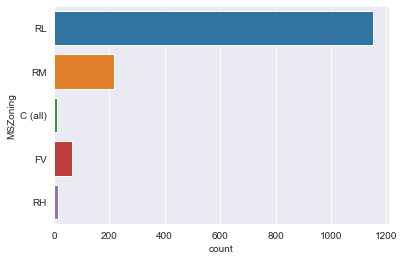



** Street : 
['Pave' 'Grvl']


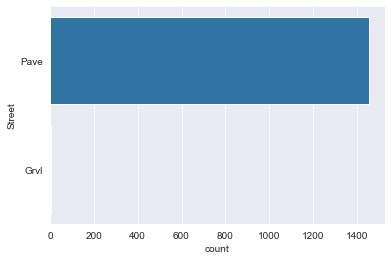



** Alley : 
[nan 'Grvl' 'Pave']


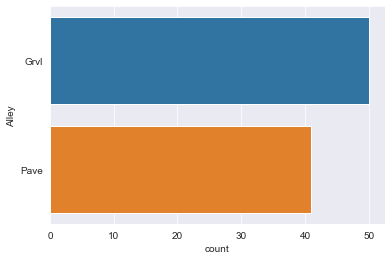



** LotShape : 
['Reg' 'IR1' 'IR2' 'IR3']


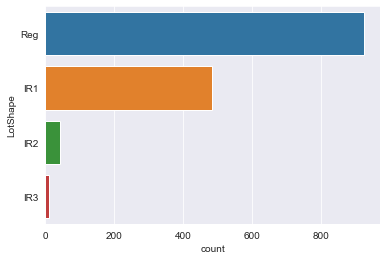



** LandContour : 
['Lvl' 'Bnk' 'Low' 'HLS']


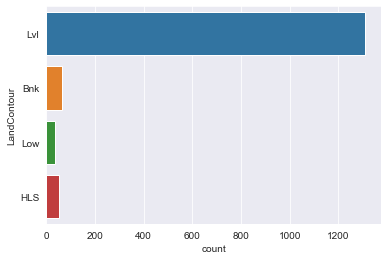



** Utilities : 
['AllPub' 'NoSeWa']


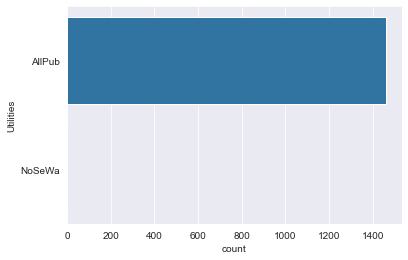



** LotConfig : 
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


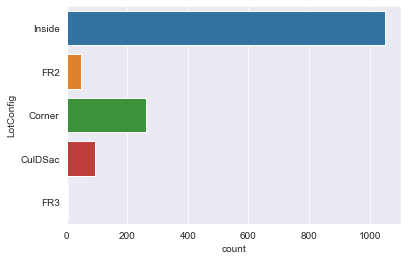



** LandSlope : 
['Gtl' 'Mod' 'Sev']


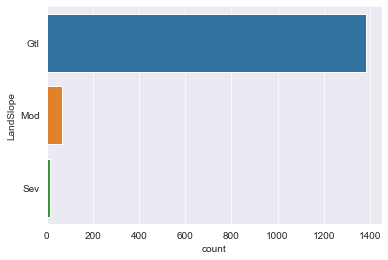



** Neighborhood : 
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


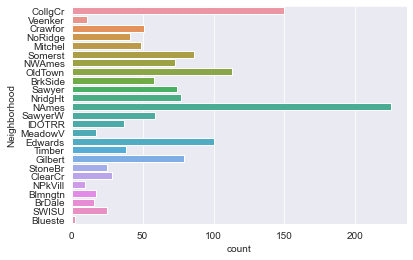



** Condition1 : 
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


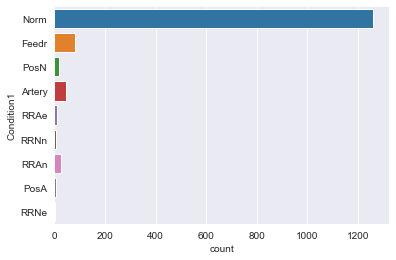



** Condition2 : 
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


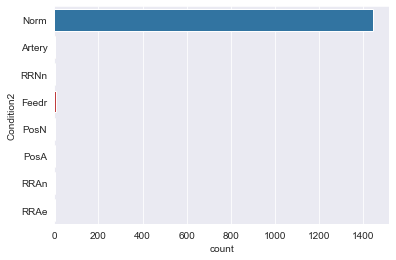



** BldgType : 
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


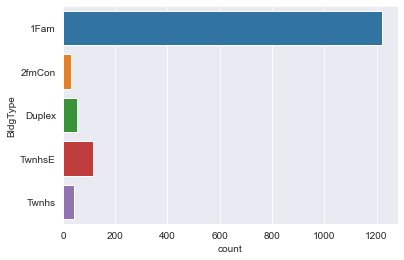



** HouseStyle : 
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


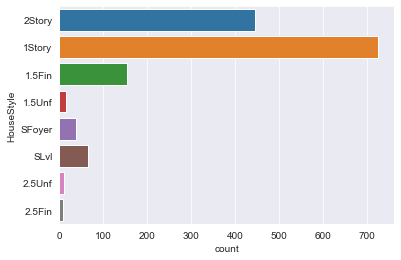



** RoofStyle : 
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


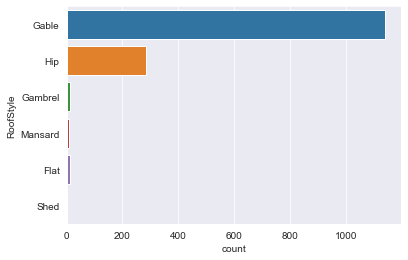



** RoofMatl : 
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


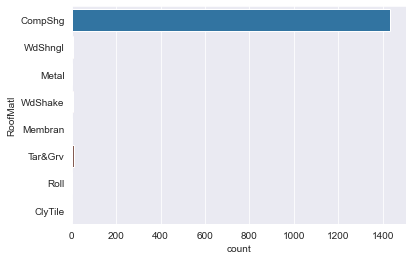



** Exterior1st : 
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


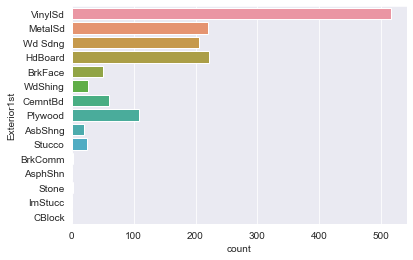



** Exterior2nd : 
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


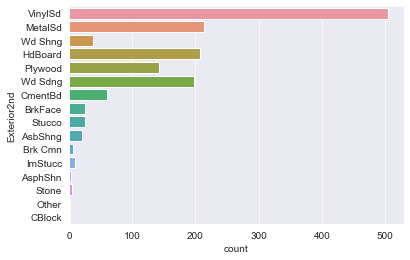



** MasVnrType : 
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]


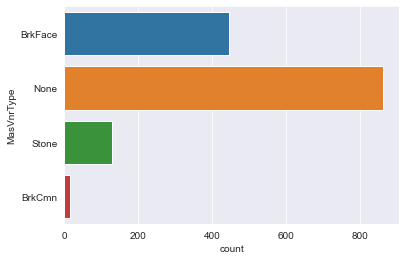



** ExterQual : 
['Gd' 'TA' 'Ex' 'Fa']


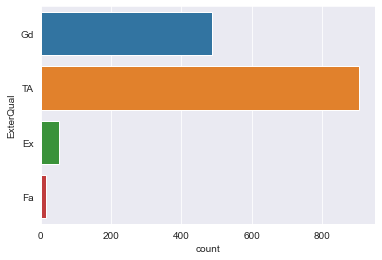



** ExterCond : 
['TA' 'Gd' 'Fa' 'Po' 'Ex']


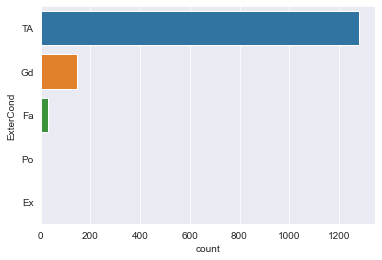



** Foundation : 
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


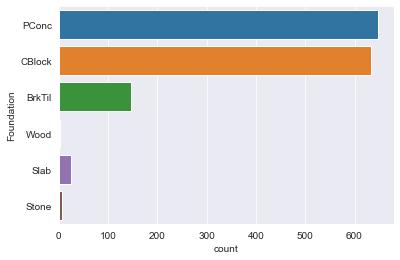



** BsmtQual : 
['Gd' 'TA' 'Ex' nan 'Fa']


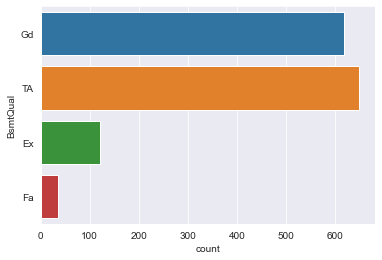



** BsmtCond : 
['TA' 'Gd' nan 'Fa' 'Po']


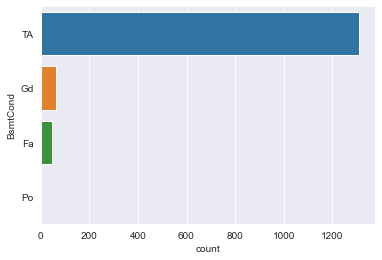



** BsmtExposure : 
['No' 'Gd' 'Mn' 'Av' nan]


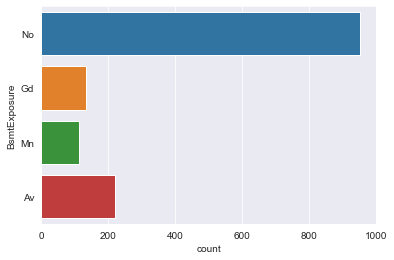



** BsmtFinType1 : 
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


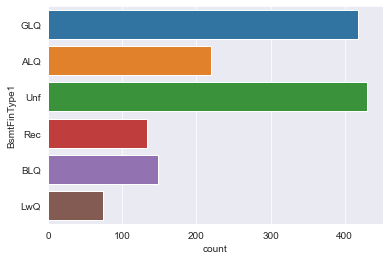



** BsmtFinType2 : 
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


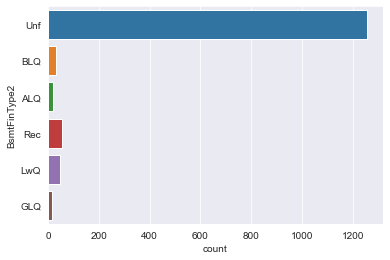



** Heating : 
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


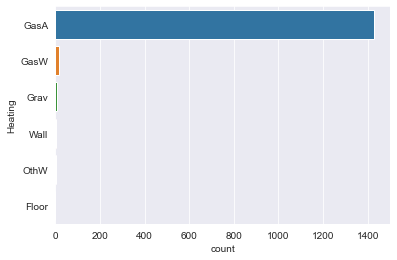



** HeatingQC : 
['Ex' 'Gd' 'TA' 'Fa' 'Po']


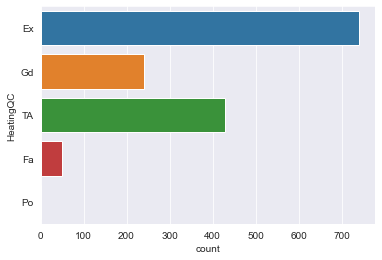



** CentralAir : 
['Y' 'N']


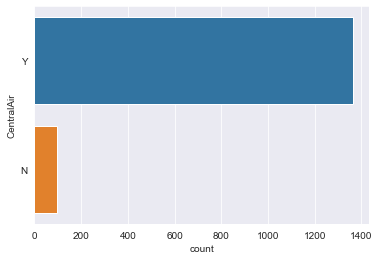



** Electrical : 
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


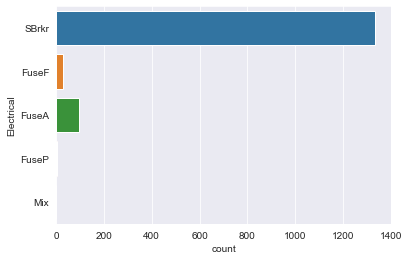



** KitchenQual : 
['Gd' 'TA' 'Ex' 'Fa']


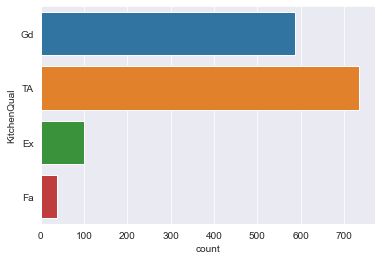



** Functional : 
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


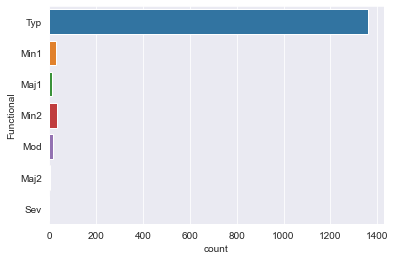



** FireplaceQu : 
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


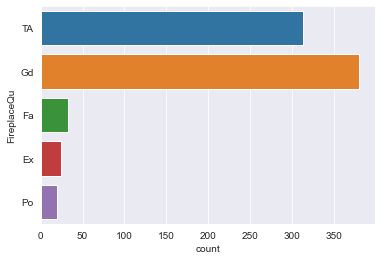



** GarageType : 
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


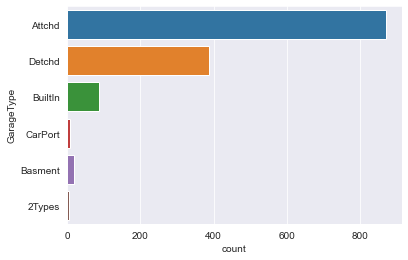



** GarageFinish : 
['RFn' 'Unf' 'Fin' nan]


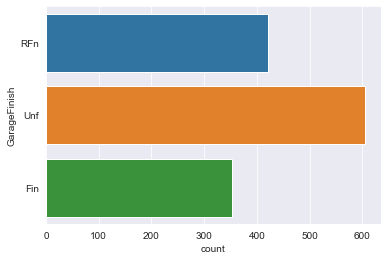



** GarageQual : 
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


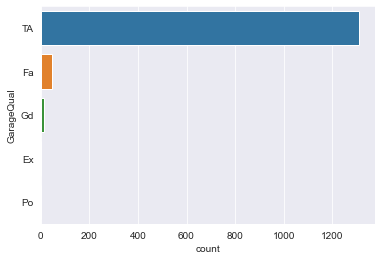



** GarageCond : 
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


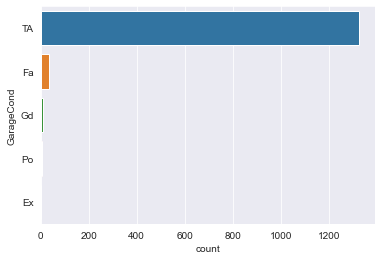



** PavedDrive : 
['Y' 'N' 'P']


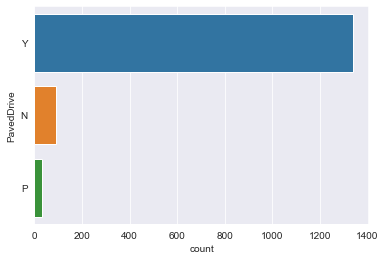



** PoolQC : 
[nan 'Ex' 'Fa' 'Gd']


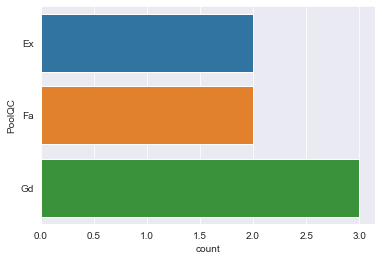



** Fence : 
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


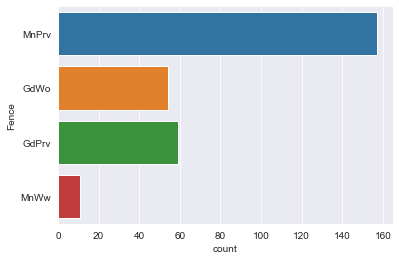



** MiscFeature : 
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


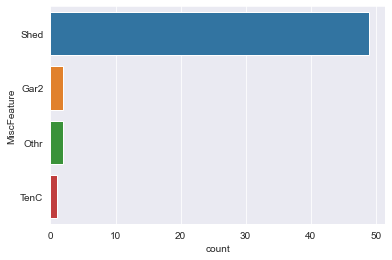



** SaleType : 
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


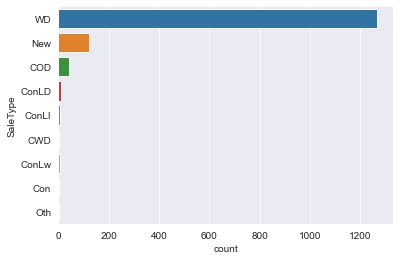



** SaleCondition : 
['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


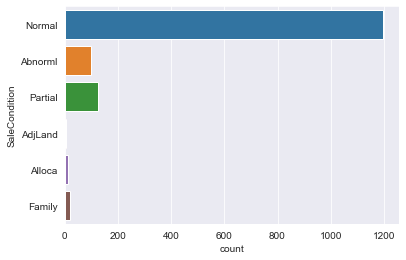

In [10]:
#Loop displays unique classes for categorical variables and provides bar plot
for features in cat_features:
    print('**', features, ': ')
    print(df_train['{}'.format(features)].unique())
    sns.countplot(y = features, data = df_train)
    plt.show()
    print('\n')

##### Continue with Value Counts for Categorical Features

In [11]:
#Loop to display value counts of each categorical feature
for features in df_train.dtypes[df_train.dtypes == 'object'].index:
    print('**', features, ': ')
    print(df_train[features].value_counts())
    print('\n')

** MSZoning : 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


** Street : 
Pave    1454
Grvl       6
Name: Street, dtype: int64


** Alley : 
Grvl    50
Pave    41
Name: Alley, dtype: int64


** LotShape : 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


** LandContour : 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


** Utilities : 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


** LotConfig : 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


** LandSlope : 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


** Neighborhood : 
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
Clear

### 2.B.2 Insights From Analysis of Categorical Variables

   There are sparse classes that will be need to be addressed 
   Categorical Features with missing data
   There are features which should be dropped
   There are categorical features which should be ordinals
   
        * = Drop (with explanation)
        S = Sparse
        O = Ordinal
        
   
        1. Street 
        Most observations are paved, but we will still keep this feature as is

        
        2. Alley is fine
        
        
        S3. LotShape has sparse classes
        Better to be just Regular, Irregular1, and Irregular2
        We will combine Reg and IR1, to highlight extreme properties
        
        
        S4. LandContour can be condensed. 
        Likely only extreme contour would affect price. 
        Lvl, Other
        
        *5. Utilities should be dropped
        All observations but 1 are Allpub
        
        S6. LotConfig has sparse classes
        combine FR1 and FR2
        
        O7. LandSlope should be ordinal
        
        8. Neighborhood has somewhat sparse classes
        Keep as is since the few in Blueste may still be important
      
        S9. Condition1 has sparse classes
        make 'Other' include all classes with < 10 observations
        
        10.Condition2 similar to condition1
        Either drop or make classes ['Norm', 'Other']
                
        11. BldgType small but useful
        
        12. HouseStyle is fine       
        
        S13. Roof style has sparse classes
        combine sparse classes into 'Other'
        
        S14. RoofMatl
        compshingle, other             
        
        S15. Exterior1st sparse classes
        make 'Other' include all classes with < 10 observations
        
        S16. Exterior2nd sparse classes
        same as Exterior1st      
               
        S17. MasVnrType. Mostly NaN even though it has a 'None' class.
        NaNs 'None'. Possibly the NaNs just mean no masonry
        
        O18.  ExterQual 
        ordinal
        
        O19.  ExterCond Spase classes. 
        ordinal
        
        S20. Foundation Sparse classes
        make 'Other' include all classes with < 10 observations
        
        O 21. BsmtQual fine
        Ordinal
        
        O 22. BsmtCond sparse classes
        Ordinal
        
        O23. BsmtExposure
        ordinal
        
        S24. Heating sparse
        [GasA, Other]
        
        S25. Electrical sparse.
        Combine to make: [Stbkr, FuseA, Other]
        
        S26. 'Functional' sparse classes.
        Replace to make New classes: Typical, Minor, other
        
        S27. GarageType sparse. 
        Basement, Builtin should be 'attached. 
        New Classes:'Attchd' 'Detchd'
        
        *28. GarageQual and GarageCond 
        sparse and probably convey the same as GarageFin.
        
        S29. PoolQC. most observations have no pool.
        Present or None
        
        S30. Fence - Sparse. replace ['MnPrv' 'GdWo' ], 'GdPrv'. 
        Replace '[MnWw', Nan], 'None'. 
        Classes: GdPrv, None
        
        S31. MiscFeature sparse.
        Reaplce ['Shed' 'Gar2' 'Othr' 'TenC'], Present. 
        Replace Nan , None.
        
        S32. SaleType sparse
       replace with[ WD, New, COD, Other]
        
        S33. SaleCondition  sparse
        replace([Aloca, AdjLand] ,'other'])
        
        S34. MSZoning sparse
        replace ([c(all), RH,] 'Other)
        
        O35. BsmtFinType1
        ordinal
        
        O36. BsmtFinType2
        ordinal
        
        O37. HeatingQC
        ordinal 
        
        O38. KitchenQual
        Ordinal
        
        O39. FireplaceQu
        ordinal
        
        O40. GarageFinish
        ordinal
        
        42. CentralAir fine
        
        43. PavedDrive fine

### 2.B.3 Cleaning of Categorical Features

#### Ordinals
Categorical Features which should be numerical

In [12]:
#List of categorical features which should be converted to ordinals
#(cats_to_nums)
cats_to_nums = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']

##### Ordinal Conversion Function

In [13]:
def cats_to_nums():
    #LotShape
    df['LotShape'] = df.LotShape.replace(
        {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
    
    #LandSlope
    df['LandSlope'] = df.LandSlope.replace(
        {'Gtl': 0, 'Mod': 1, 'IR2': 2, 'Sev': 3})
    
    #ExterQual
    df['ExterQual'] = df.ExterQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #ExterCond
    df['ExterCond'] = df.ExterCond.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #BsmtQual
    df['BsmtQual'] = df.BsmtQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    # BsmtCond
    df['BsmtCond'] = df.BsmtCond.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #BsmtExposure
    df['BsmtExposure'] = df.BsmtExposure.replace(
        {'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3})
    
    #BsmtFinType1
    df['BsmtFinType1'] = df.BsmtFinType1.replace(
        {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})
    
    #BsmtFinType2
    df['BsmtFinType2'] = df.BsmtFinType2.replace(
        {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})
    
    #HeatingQC
    df['HeatingQC'] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #KitchenQual
    df['KitchenQual'] = df.KitchenQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #FireplaceQu
    df['FireplaceQu'] = df.FireplaceQu.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #GarageFinish
    df['GarageFinish'] = df.GarageFinish.replace(
        {'Fin': 0, 'RFn': 1, 'Unf': 2})

#### Sparse Classes

##### Sparse Classes Replacement Function

In [14]:
def replace_sparse_classes(df):

    
    #LandContour
    df.LandContour.replace([ 'Bnk' 'Low' 'HLS'], 'Other', inplace=True)
    
    #LotConfig
    df.LotConfig.replace(['FR2', 'FR3'], 'Other', inplace=True)
    
    #Condition1 alteration
    df.Condition1.replace(['RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'], 'Other', inplace = True)
    
    #Condition2 alteration
    df.Condition2.replace(['Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'Other', inplace = True)
    
    #RoofStyle alteration
    df.RoofStyle.replace(['Gambrel', 'Mansard', 'Flat', 'Shed'], 'Other', inplace = True)
    
    #RoofMatl alteration
    df.RoofMatl.replace(['WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile'], 'Other', inplace = True)
    
    #Exterior1st alteration
    df.Exterior1st.replace(['BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'], 'Other', inplace = True) 
    
    #Exterior2nd alteration
    df.Exterior2nd.replace(['AsphShn', 'Stone', 'ImStucc', 'CBlock'], 'Other', inplace = True)
    
    #Foundation
    df.Foundation.replace(['Wood', 'Stone'], 'Other', inplace=True)
        
    #Heating alteration
    df.Heating.replace(['GasA','GasW'], 'Gas', inplace = True)
    df.Heating.replace(['Grav', 'Wall', 'OthW', 'Floor'], 'Other', inplace = True)
    
    #Electrical alteration
    df.Electrical.replace(['FuseP', 'Mix'], 'Other', inplace = True)
    
    #Functional alteration
    df.Functional.replace(['Mod', 'Maj2','Sev'], 'Other', inplace = True)
    df.Functional.replace(['Min1', 'Min2'], 'Min', inplace = True)   
           
    #GarageType
    df.GarageType.replace([ 'BuiltIn', 'Basment', '2Types'], 'Attchd', inplace=True)
    df.GarageType.replace(['CarPort'], 'None', inplace=True)
    
    #Fence
    df.Fence.replace(['MnPrv' 'GdWo' ], 'GdPrv', inplace=True)
    df.Fence.replace( ['MnWw'], 'None', inplace=True)
    
    #SaleType alteration
    df.SaleType.replace(['ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], 'Other', inplace = True)
    
    #PoolQC
    df.PoolQC.replace(['Gd', 'Ex','Fa'], 'Present', inplace = True)
    
    #SaleCondition alteration
    df.SaleCondition.replace(['AdjLand', 'Alloca', 'Family'], 'Other', inplace=True)
    
    #Central air - N to match None value conversion to 'None'
    df.CentralAir.replace(['N'], 'None', inplace=True)
    
    #PavedDrive
    df.PavedDrive.replace(['N'], 'None', inplace=True)
    
    
    
    return

#### Drops

##### Feature Drops variable

In [15]:
#define drops variable
#Other drops from later are added here

drops = ['LowQualFinSF', 'GarageArea', 'GarageQual', 
         'GarageCond', 'Id', 'Utilities', '1stFlrSF','2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtHalfBath', 'BsmtFullBath']

### 2.B.4 Missing Categorial Data
#### Treatment of Categorical NaNs
    Some NaNs should be replaced with 'None'
    Others should be replaced with the mode, or flagged as missing, or both
    Assigning variables to both types will make them easier to work with

In [16]:
#Display Categorical Features with missing data
df_train.select_dtypes(include=['object']).isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

#### Classify features according to what NaN means for them

In [17]:
#Assign variables for lists of categorical feature NaN types

#Categorical NaNs which should be 'None'
cat_nans_to_None = ['Alley', 'MasVnrType', 'CentralAir', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',]

#Categorical NaNs which should not be 'None'
cat_nans_to_mode= ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Electrical', 'Condition1',
 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
 'Heating', 'Functional', 'SaleType', 'SaleCondition' ]



## 2.C Analysis and Cleaning of Numeric Features

### 2.C.1 Analysis of Numeric Features
#### Looking for:
    Numeric Features with missing data
    Numeric Features which should be categorical (strings)
    Features that should be dropped



In [18]:
#Variable for numeric features
num_features = list(df_train.select_dtypes(exclude = 'object').columns)
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [19]:
#display missing data in numeric features

df_train.select_dtypes(exclude = 'object').isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

#### Initial Insights from Analysis of Numeric Features


    Some Features should be converted to strings
    Numeric Features have missing data
    Variables need to be created to sort NaNs which should be 0 and NaNs which should not
    Some features should be dropped

### 2.C.2 Cleaning of Numeric Features

#### Numeric Variables that should be strings

In [20]:
#Convert these categorical "numeric" variables into strings
nums_to_cats = ['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemoAdd', 'MSSubClass']



#### Function to Convert Selected Numeric Variables to Strings

In [21]:
def nums_to_cats():
    for var in nums_to_cats:
        df[var] = df[var].astype(str)

#### Handle Missing Numeric Data

In [22]:
#Assign variables for lists of numerical feature NaN types
num_nans_to_0 = ['MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
 'BsmtHalfBath',  'Fireplaces', 'GarageCars',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
 'ScreenPorch', 'PoolArea', 'MiscVal']

num_nans_to_mean = [ 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SalePrice']



## 2.C Guilty Outliers Initial Investigation

### 2.C.1 Examining Outliers

#### Examining Likely Culprits

In [23]:
#look for Guilty Outliers loop

for feature in df_train[['GrLivArea', 'YearBuilt', 'LotArea', 'GarageArea', 'SalePrice', 'YrSold', 'LotArea']]:
    print('**',feature, ':', df_train['{}'.format(feature)].describe(), '\n')
   
    


** GrLivArea : count   1460.000
mean    1515.464
std      525.480
min      334.000
25%     1129.500
50%     1464.000
75%     1776.750
max     5642.000
Name: GrLivArea, dtype: float64 

** YearBuilt : count   1460.000
mean    1971.268
std       30.203
min     1872.000
25%     1954.000
50%     1973.000
75%     2000.000
max     2010.000
Name: YearBuilt, dtype: float64 

** LotArea : count     1460.000
mean     10516.828
std       9981.265
min       1300.000
25%       7553.500
50%       9478.500
75%      11601.500
max     215245.000
Name: LotArea, dtype: float64 

** GarageArea : count   1460.000
mean     472.980
std      213.805
min        0.000
25%      334.500
50%      480.000
75%      576.000
max     1418.000
Name: GarageArea, dtype: float64 

** SalePrice : count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64 

** YrSold : count   1460.000
mean    2007.816

### 2.C.2 Determining Guilt of Outliers

#### Bedrooms Data Analysis

count   1460.000
mean       2.866
std        0.816
min        0.000
25%        2.000
50%        3.000
75%        3.000
max        8.000
Name: BedroomAbvGr, dtype: float64


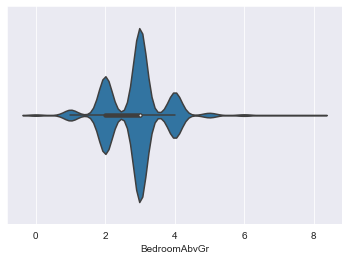

In [24]:
#Examine Bedrooms more closely
sns.violinplot(x = 'BedroomAbvGr', data= df_train)
print(df_train.BedroomAbvGr.describe())

In [25]:
#there is only 1 observation with 8 bedrooms, and none with 7. 

df_train.BedroomAbvGr.sort_values(ascending=False).head(20)

635     8
570     6
1350    6
291     6
144     6
897     6
843     6
330     6
1328    5
1032    5
1030    5
1031    5
789     5
628     5
1386    5
1387    5
118     5
1062    5
137     5
1068    5
Name: BedroomAbvGr, dtype: int64

In [26]:
# Six observations have no above ground bedrooms
#Since this does not rule out basement bedrooms, this is probably neither an error nor an indication of missing data
print( len(df_train[df_train.BedroomAbvGr == 0]) )

6


In what ways do abnormal bedroom numbers stand out?

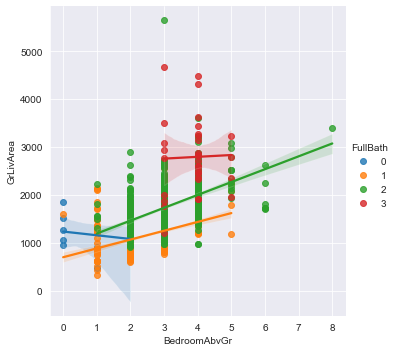

In [27]:
sns.lmplot(x= 'BedroomAbvGr', y = 'GrLivArea', hue = 'FullBath',  data = df_train)

C:\Users\The Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BedroomAbvGr'>

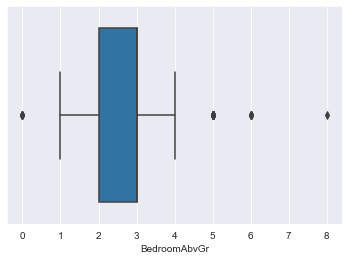

In [28]:
sns.boxplot(df_train['BedroomAbvGr'])

In [29]:
print(df_train[df_train.BedroomAbvGr ==5].sum())
print(df_train[df_train.BedroomAbvGr ==6])
print(df_train[df_train.BedroomAbvGr ==8])

Id                                                           17288
MSSubClass                                                    1720
MSZoning                RLRLRMRLRLRLRLRLRLRLRLRHRLRLRMRMRMRLRMRLRM
LotFrontage                                               1222.000
LotArea                                                     259606
                                       ...                        
MoSold                                                         144
YrSold                                                       42159
SaleType               WDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDWDCWD
SaleCondition    NormalFamilyAbnormlNormalNormalAdjLandFamilyNo...
SalePrice                                                  3797200
Length: 72, dtype: object
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
144    145          90       RM       70.000     9100   Pave   NaN      Reg   
291    292         190       RL       55.000     5687   Pave  Grvl      Reg   


C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\2661410202.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train[df_train.BedroomAbvGr ==5].sum())


#### Insights from Bedroom Analysis
#### We should consider dropping one observation, since it does not seem representative:

#BedroomAbvGr>7

#### Bathroom Data Analysis and Cleaning

<AxesSubplot:xlabel='FullBath'>

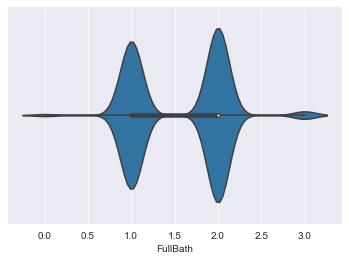

In [30]:
#Violin Plot of Bathroom Data
sns.violinplot(x = 'FullBath', data= df_train)

In [31]:
#Display summary stats for full baths

df_train.FullBath.describe()


count   1460.000
mean       1.565
std        0.551
min        0.000
25%        1.000
50%        2.000
75%        2.000
max        3.000
Name: FullBath, dtype: float64

#### It seems some observations have no full bathrooms. This is strange.

In [32]:
#Create DF to investigate missing Bathroom situation
NoFullBaths = df_train[df_train['FullBath']==0]
NoFullBaths.head(20)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.000,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.000,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.000,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
188,189,90,RL,64.000,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.000,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.000,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337
375,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
597,598,120,RL,53.000,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.000,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.000,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
634,635,90,RL,64.000,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NaN,Detchd,1980.000,Unf,2,576,TA,TA,Y,264,56,0,0,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000
916,917,20,C (all),50.000,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.000,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.000,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1163,1164,90,RL,60.000,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,Av,GLQ,1198,Unf,0,0,1198,GasA,TA,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,TA,6,Typ,0,NaN,CarPort,1969.000,Unf,2,400,Fa,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
1213,1214,80,RL,NaN,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,NaN,Attchd,1965.000,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1270,1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.000,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.000,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000


In [33]:
#perhaps these homes have full baths in the basement
NoFullBaths[['FullBath', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath']]

,FullBath,HalfBath,BsmtHalfBath,BsmtFullBath
53,0,1,0,2
188,0,2,0,2
375,0,1,0,1
597,0,2,2,0
634,0,0,0,2
916,0,0,0,1
1163,0,2,0,2
1213,0,0,1,1
1270,0,1,0,2


##### Observation 597 has no full baths
This seems unlikely

In [34]:
#Examine 597 more closely
print(df_train.iloc[597].SalePrice)
print(df_train.iloc[597].GrLivArea)
print(df_train.iloc[597].LotArea)

#It is possible that this observation has only 3/4 baths
#I think we should not drop this observation

194201
1402
3922


#### Bathrooms Conclusion
Bathrooms will probably be best described as Total_Full_Baths and _Total_Half_Baths. It should not make a huge difference if they are in the basement

#### Lot Area Data Analysis and Cleaning

count     1460.000
mean     10516.828
std       9981.265
min       1300.000
25%       7553.500
50%       9478.500
75%      11601.500
max     215245.000
Name: LotArea, dtype: float64


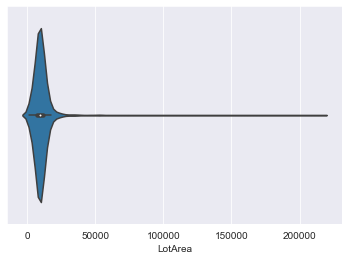

In [35]:
#Possible outlier in LotArea
sns.violinplot(x = 'LotArea', data= df_train)
print(df_train.LotArea.describe())

In [36]:
#A few properties have abnormally large lot areas, so we should look into that
df_train.LotArea.sort_values(ascending=False).head(20)

313     215245
335     164660
249     159000
706     115149
451      70761
1298     63887
1396     57200
769      53504
457      53227
384      53107
53       50271
661      46589
848      45600
523      40094
271      39104
1287     36500
1169     35760
1184     35133
411      34650
529      32668
Name: LotArea, dtype: int64

C:\Users\The Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

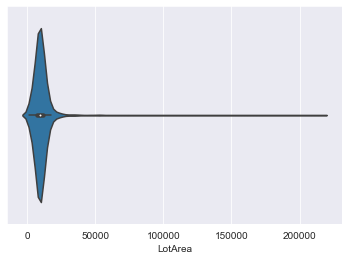

In [37]:
#Looks like there may be possible outliers here
sns.violinplot(df_train.LotArea)

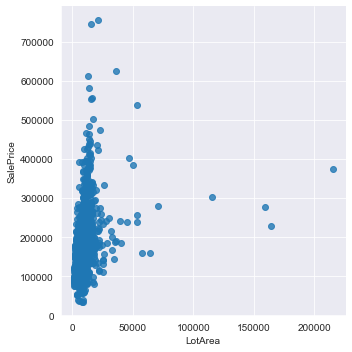

In [38]:
#This graph shows a few very large lot sizes with very low sale prices
sns.lmplot(x= 'LotArea', y= 'SalePrice', data = df_train, 
          fit_reg =False)
plt.show()

In [39]:
df_train[df_train.LotArea > 100000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.000,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.000,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.000,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.000,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.000,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.000,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.000,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [40]:
df_train.LandSlope.describe()

count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object

#### Conclusion

These properties seem to have nothing to account for the Low Price and High Lot Area. Moreover, their LotArea is significantly higher than all other observations, so it is more likely to hurt the model than help it. So, I think we should drop those 4 observations: LotArea>100000


### Square Footage Data Analysis and Cleaning

<AxesSubplot:xlabel='GrLivArea'>

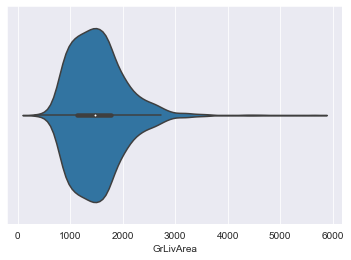

In [41]:
#Possibly guilty outlier in above ground living area
#Examine SF in GrLivArea
sns.violinplot(x = 'GrLivArea', data= df_train)

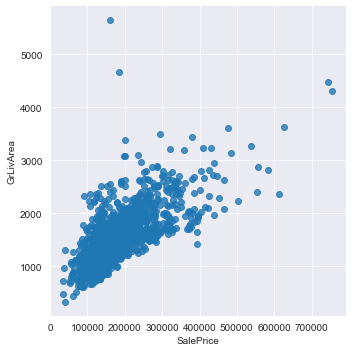

In [42]:
#There are a few very large homes with very low Sale Prices
#There is nothing to suggest that they are inaccurate, but we might consider dropping these observations
sns.lmplot(x= 'SalePrice', y= 'GrLivArea', data = df_train, fit_reg = False)
plt.show()

#we might drop if 'SalesPrice'<200000 and 'GrLivArea'>4000

In [43]:
#We need total square footage of basement areas, and total squarefootage of above ground floors
#and total squarefootage basement and above ground living area

#Create dataframe to explore SF data more closely
sqft_data = df_train[['GrLivArea','BsmtFinSF1', 'BsmtFinSF2', 'EnclosedPorch', 'WoodDeckSF', 'OpenPorchSF', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice', '1stFlrSF', '2ndFlrSF', 'ScreenPorch', '3SsnPorch']]


#Check for anomalies in total basement sqft calculation
print('Total basement sqft means finished 1, finished 2, and unfinished basement sqft:')
print( all(sqft_data['BsmtFinSF1'] + sqft_data['BsmtFinSF2'] + sqft_data['BsmtUnfSF'] == sqft_data['TotalBsmtSF']), '\n'  )




#Check if GrLivArea is the same as first and second floor living area
print('Above grade sqft equals 1st and 2nd floor sqft')
print( all(sqft_data['1stFlrSF'] + sqft_data['2ndFlrSF']  == sqft_data['GrLivArea']), '\n' )


#Check if GrLivArea is the same as total finished sqft
print('Above grade sqft equals 1st and 2nd floor sqft plut finished basement sqft')
print( all(sqft_data['BsmtFinSF1'] + sqft_data['BsmtFinSF2'] + sqft_data['1stFlrSF'] + sqft_data['2ndFlrSF']  == sqft_data['GrLivArea'] ) , '\n' )


#Check if GrLivArea is the same as total sqft (finished and unfinished)
print('Above grade sqft equals 1st and 2nd floor sqft plut finished basement sqft')
print( all(sqft_data['TotalBsmtSF'] + sqft_data['1stFlrSF'] + sqft_data['2ndFlrSF']  == sqft_data['GrLivArea'] ) , '\n' )



Total basement sqft means finished 1, finished 2, and unfinished basement sqft:
True 

Above grade sqft equals 1st and 2nd floor sqft
False 

Above grade sqft equals 1st and 2nd floor sqft plut finished basement sqft
False 

Above grade sqft equals 1st and 2nd floor sqft plut finished basement sqft
False 



#### Something seems to be wrong with SF calculation
GrLivArea should be 1stFlrSF + 2ndFlrSF but it isn't for some observations. 

In [44]:
# Let's see whats going on with the SF data
sqft_data['1st_&_2nd_SF'] = sqft_data['1stFlrSF'] + sqft_data['2ndFlrSF']
sqft_data.head(10)

C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\3918361794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqft_data['1st_&_2nd_SF'] = sqft_data['1stFlrSF'] + sqft_data['2ndFlrSF']


,GrLivArea,BsmtFinSF1,BsmtFinSF2,EnclosedPorch,WoodDeckSF,OpenPorchSF,BsmtUnfSF,TotalBsmtSF,SalePrice,1stFlrSF,2ndFlrSF,ScreenPorch,3SsnPorch,1st_&_2nd_SF
0,1710,706,0,0,0,61,150,856,208500,856,854,0,0,1710
1,1262,978,0,0,298,0,284,1262,181500,1262,0,0,0,1262
2,1786,486,0,0,0,42,434,920,223500,920,866,0,0,1786
3,1717,216,0,272,0,35,540,756,140000,961,756,0,0,1717
4,2198,655,0,0,192,84,490,1145,250000,1145,1053,0,0,2198
5,1362,732,0,0,40,30,64,796,143000,796,566,0,320,1362
6,1694,1369,0,0,255,57,317,1686,307000,1694,0,0,0,1694
7,2090,859,32,228,235,204,216,1107,200000,1107,983,0,0,2090
8,1774,0,0,205,90,0,952,952,129900,1022,752,0,0,1774
9,1077,851,0,0,0,4,140,991,118000,1077,0,0,0,1077


In [45]:
#Double check that for some observations 1st_&_2nd_SF != GrLivArea

print( all(sqft_data['1st_&_2nd_SF'] == sqft_data['GrLivArea']), '\n' )

SF_mismatch = sqft_data[sqft_data['1st_&_2nd_SF'] != sqft_data['GrLivArea']]
print( SF_mismatch.shape )


False 

(26, 14)


#### 26 observations have a disparity between GrLivArea and 1st_&_2nd_SF

In [46]:
#Display observations with suspicious square footage
SF_mismatch

,GrLivArea,BsmtFinSF1,BsmtFinSF2,EnclosedPorch,WoodDeckSF,OpenPorchSF,BsmtUnfSF,TotalBsmtSF,SalePrice,1stFlrSF,2ndFlrSF,ScreenPorch,3SsnPorch,1st_&_2nd_SF
51,1176,0,0,0,112,0,816,816,114500,816,0,0,0,816
88,1526,0,0,156,0,0,1013,1013,85000,1013,0,0,0,1013
125,754,490,0,0,53,0,30,520,84500,520,0,0,0,520
170,1382,360,0,0,237,0,360,720,128500,854,0,0,0,854
185,3608,0,0,0,0,260,1107,1107,475000,1518,1518,410,0,3036
187,1656,0,0,0,0,0,660,660,135000,808,704,0,140,1512
197,3112,1036,184,552,0,16,140,1360,235000,1360,1360,0,0,2720
198,2229,0,0,30,0,198,755,755,104000,929,929,0,0,1858
263,1316,234,692,0,0,0,0,926,130000,926,0,0,0,926
267,2192,378,0,0,262,24,342,720,179500,1052,720,0,0,1772


In [47]:
#Create column to examine how great the mismatch is

SF_mismatch['SF_diff'] = SF_mismatch['GrLivArea'] - SF_mismatch['1st_&_2nd_SF']
SF_mismatch.sort_values(by = 'SF_diff', ascending = False )

C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\2094753180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_mismatch['SF_diff'] = SF_mismatch['GrLivArea'] - SF_mismatch['1st_&_2nd_SF']


,GrLivArea,BsmtFinSF1,BsmtFinSF2,EnclosedPorch,WoodDeckSF,OpenPorchSF,BsmtUnfSF,TotalBsmtSF,SalePrice,1stFlrSF,2ndFlrSF,ScreenPorch,3SsnPorch,1st_&_2nd_SF,SF_diff
185,3608,0,0,0,0,260,1107,1107,475000,1518,1518,410,0,3036,572
170,1382,360,0,0,237,0,360,720,128500,854,0,0,0,854,528
635,3395,256,0,0,0,110,1184,1440,200000,1440,1440,0,0,2880,515
1009,1522,0,0,138,0,0,1008,1008,102000,1008,0,0,0,1008,514
88,1526,0,0,156,0,0,1013,1013,85000,1013,0,0,0,1013,513
883,2230,0,0,0,0,188,795,795,118500,954,795,0,0,1749,481
1173,3086,152,469,0,122,0,977,1598,200500,1636,971,0,0,2607,479
406,1639,0,0,0,0,0,1064,1064,115000,1166,0,0,0,1166,473
267,2192,378,0,0,262,24,342,720,179500,1052,720,0,0,1772,420
1031,3082,523,0,0,136,63,301,824,197000,1687,998,0,0,2685,397


In [48]:
#Create new variable to examine price/sqfoot of the problem SF data
SF_mismatch['P_SF_GR'] = (SF_mismatch['SalePrice']) /( SF_mismatch['GrLivArea'])
SF_mismatch['P_SF_1st2nd'] = (SF_mismatch['SalePrice']) /( SF_mismatch['1st_&_2nd_SF'])

SF_mismatch[['P_SF_GR', 'P_SF_1st2nd', 'SalePrice', '1st_&_2nd_SF', 'GrLivArea']]

C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\236310234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_mismatch['P_SF_GR'] = (SF_mismatch['SalePrice']) /( SF_mismatch['GrLivArea'])
C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\236310234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_mismatch['P_SF_1st2nd'] = (SF_mismatch['SalePrice']) /( SF_mismatch['1st_&_2nd_SF'])


,P_SF_GR,P_SF_1st2nd,SalePrice,1st_&_2nd_SF,GrLivArea
51,97.364,140.319,114500,816,1176
88,55.701,83.909,85000,1013,1526
125,112.069,162.500,84500,520,754
170,92.981,150.468,128500,854,1382
185,131.652,156.456,475000,3036,3608
187,81.522,89.286,135000,1512,1656
197,75.514,86.397,235000,2720,3112
198,46.658,55.974,104000,1858,2229
263,98.784,140.389,130000,926,1316
267,81.889,101.298,179500,1772,2192


#### According to the DF above, the mismatch in SF is not explained by the presence of a porch or deck, or anything else
This seems to indicate that it is an error

#### To fix it:
We need to know if GrLivArea is wrong, or if the reported SF of 1st or 2nd floor is wrong

We can't know for sure, but looking at Price/sq ft (for each) might tell us something
We should Compare price per GrLivArea sqft, and 1st_&_2nd_SF in the mismatched df with price/sqft for non-mismatched observations

In [49]:
#Print Price per sq foot data for data with no mismatch
sqft_data['price_sqft'] = sqft_data['SalePrice'] / sqft_data['GrLivArea']
print('non-mismatched:', '\n', sqft_data['price_sqft'].describe(), '\n')

#Add columns and print Price per sq foot data for mismatched data
SF_mismatch['Gr_pr_sqft'] = SF_mismatch['SalePrice'] / SF_mismatch['GrLivArea']
SF_mismatch['1st_2nd_pr_sqft'] = SF_mismatch['SalePrice'] / SF_mismatch['1st_&_2nd_SF']

#Print summary statistics both both calculations
print('GR_mismatch: ', '\n', SF_mismatch['Gr_pr_sqft'].describe(), '\n')

print('1st_2nd_mismatch: ', '\n' , SF_mismatch['1st_2nd_pr_sqft'].describe(), '\n')

non-mismatched: 
 count   1460.000
mean     120.573
std       31.391
min       28.359
25%       99.822
50%      120.099
75%      138.700
max      276.251
Name: price_sqft, dtype: float64 

GR_mismatch:  
 count    26.000
mean     83.080
std      24.489
min      46.658
25%      65.435
50%      78.518
75%      98.429
max     131.652
Name: Gr_pr_sqft, dtype: float64 

1st_2nd_mismatch:  
 count    26.000
mean    103.434
std      32.213
min      55.974
25%      75.138
50%      99.909
75%     128.896
max     162.500
Name: 1st_2nd_pr_sqft, dtype: float64 



C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\1143342171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqft_data['price_sqft'] = sqft_data['SalePrice'] / sqft_data['GrLivArea']
C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\1143342171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_mismatch['Gr_pr_sqft'] = SF_mismatch['SalePrice'] / SF_mismatch['GrLivArea']
C:\Users\The Lappy\AppData\Local\Temp\ipykernel_23752\1143342171.py:7: SettingWithCopyWarning: 
A value is trying to be set 

#### SF CONCLUSIONS

    The above shows that using 1st_&_2nd_SF to calculate price/sqft yields a Price/SF mean closer to the mean for the non-mismatched data
    I will assume, then, that we should replace GrLiveArea with 1st and 2nd floor SF totals.
    This will only change 26 observations
    There is still no variable describing total finished square footage; We could make 1 total_Fin_SQFT variable, or make a total finised basement SF and keep it seperate from GrLivArea. 

Notes:
SF: We have addressed the redundant SF issue, which will be fixed in the code

Garage: Cars and SF seems to get at the same thing. # of cars is probably better to keep, since it is unlikely that a slightly higher SF in a 2 car garage will mean anything more than just being a 2 car garage. So we can drop GarageArea

GarageArea added to drops list

### Overall Insights from Exploratory Analysis

#### Bedrooms
We should drop one observation, since it does not seem representative:
#BedroomAbvGr>7

#### Lot Area 
4 Observations hasLotArea significantly higher than all other observations. These are more likely to hurt the model than help it. Drop those 4 observations: LotArea>100000

#### Square Footage
We should replace GrLivArea with 1st and 2nd floor SF totals and then delete 1st and 2nd floor sqft columns
This will only change 26 observations of GrLivArea. We should also make a varible for total finished square footage


## 2.D Clean Data Function
Implementing Insights from Exploratory Analysis

In [50]:
#Data Cleaning Function
def clean_data(df):
    

#Define Variables

    #Assign categorical feaures variable
    cat_features = df.dtypes[df.dtypes == 'object'].index.tolist()

    #Categorical features which should be converted to ordinals
    cats_to_nums = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']
    
    #Numeric Features which should be strings
    nums_to_cats = ['MSSubClass']
    # I previously had more nums_to_cats but it messed up my model
    
    #Categorical NaNs which should be 'None'
    cat_nans_to_None = ['Alley', 'MasVnrType', 'CentralAir', 'GarageType', 'PavedDrive', 'PoolQC', 
                        'Fence', 'MiscFeature',]

    #Categorical NaNs which should not be 'None'
    cat_nans_to_mode= ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Electrical', 'Condition1',
                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                       'Foundation','Heating', 'Functional', 'SaleType', 'SaleCondition', ]

  

    #Variable list of numerical NaNs that get replaced with 0
    num_nans_to_0 = ['MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
                     'BsmtHalfBath',  'Fireplaces', 'GarageCars',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                     '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal','LotShape', 'LandSlope', 'ExterQual', 'ExterCond',
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 
                     'KitchenQual', 'FireplaceQu', 'GarageFinish']

    #Variable list of numerical NaNs that get replaced with Mean
    num_nans_to_mean = ['MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd',
        'MSSubClass','LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SalePrice']

    
    

#CLEAN DATA:


#Convert Categorical Features which should be ordinals

    #LotShape
    df['LotShape'] = df.LotShape.replace(
        {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
    
    #LandSlope
    df['LandSlope'] = df.LandSlope.replace(
        {'Gtl': 0, 'Mod': 1, 'IR2': 2, 'Sev': 3})
    
    #ExterQual
    df['ExterQual'] = df.ExterQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #ExterCond
    df['ExterCond'] = df.ExterCond.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #BsmtQual
    df['BsmtQual'] = df.BsmtQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    # BsmtCond
    df['BsmtCond'] = df.BsmtCond.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #BsmtExposure
    df['BsmtExposure'] = df.BsmtExposure.replace(
        {'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3})
    
    #BsmtFinType1
    df['BsmtFinType1'] = df.BsmtFinType1.replace(
        {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})
    
    #BsmtFinType2
    df['BsmtFinType2'] = df.BsmtFinType2.replace(
        {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})
    
    #HeatingQC
    df['HeatingQC'] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #KitchenQual
    df['KitchenQual'] = df.KitchenQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #FireplaceQu
    df['FireplaceQu'] = df.FireplaceQu.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #GarageFinish
    df['GarageFinish'] = df.GarageFinish.replace(
        {'Fin': 0, 'RFn': 1, 'Unf': 2})
    
    print ('Relevant Categorical Features replaced as ordinals.')
    
    
    
#Replace Sparse Classes

    
    #LandContour
    df.LandContour.replace([ 'Bnk' 'Low' 'HLS'], 'Other', inplace=True)
    
    #LotConfig
    df.LotConfig.replace(['FR2', 'FR3'], 'Other', inplace=True)
    
    #Condition1 alteration
    df.Condition1.replace(['RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'], 'Other', inplace = True)
    
    #Condition2 alteration
    df.Condition2.replace(['Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'Other', inplace = True)
    
    #RoofStyle alteration
    df.RoofStyle.replace(['Gambrel', 'Mansard', 'Flat', 'Shed'], 'Other', inplace = True)
    
    #RoofMatl alteration
    df.RoofMatl.replace(['WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile'], 'Other', inplace = True)
    
    #Exterior1st alteration
    df.Exterior1st.replace(['BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'], 'Other', inplace = True) 
    
    #Exterior2nd alteration
    df.Exterior2nd.replace(['AsphShn', 'Stone', 'ImStucc', 'CBlock'], 'Other', inplace = True)
    
    #Foundation
    df.Foundation.replace(['Wood', 'Stone'], 'Other', inplace=True)
        
    #Heating alteration
    df.Heating.replace(['GasA','GasW'], 'Gas', inplace = True)
    df.Heating.replace(['Grav', 'Wall', 'OthW', 'Floor'], 'Other', inplace = True)
    
    #Electrical alteration
    df.Electrical.replace(['FuseP', 'Mix'], 'Other', inplace = True)
    
    #Functional alteration
    df.Functional.replace(['Mod', 'Maj2','Sev'], 'Other', inplace = True)
    df.Functional.replace(['Min1', 'Min2'], 'Min', inplace = True)   
           
    #GarageType
    df.GarageType.replace([ 'BuiltIn', 'Basment', '2Types'], 'Attchd', inplace=True)
    df.GarageType.replace(['CarPort'], 'None', inplace=True)
    
    #Fence
    df.Fence.replace(['MnPrv' 'GdWo' ], 'GdPrv', inplace=True)
    df.Fence.replace( ['MnWw'], 'None', inplace=True)
    
    #SaleType alteration
    df.SaleType.replace(['ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], 'Other', inplace = True)
    
    #PoolQC
    df.PoolQC.replace(['Gd', 'Ex','Fa'], 'Present', inplace = True)
    
    #SaleCondition alteration
    df.SaleCondition.replace(['AdjLand', 'Alloca', 'Family'], 'Other', inplace=True)
    
    #Central air - N to match None value conversion to 'None'
    df.CentralAir.replace(['N'], 'None', inplace=True)
    
    #PavedDrive
    df.PavedDrive.replace(['N'], 'None', inplace=True)
    
    
    
    print( 'Sparse classes have been addressed.')
    
    
#Loops to Fill NaNs
    
    #Categorical NaNs to None
    for feature in cat_nans_to_None:
        df[feature].fillna('None', inplace = True)
    print ('Cat NaNs filled to None')
    
    #Categorical NaNs to Mode
    for feature in cat_nans_to_mode:
        df[feature].fillna(df[feature].mode()[0], inplace = True)
    print ('Cat NaNs filled to Mode')
    
    #Numeric NaNs to 0
    for feature in num_nans_to_0:
        df[feature].fillna(0, inplace = True)
    print ('Num NaNs filled to 0')
    
    #Numeric NaNs to Mean
    for feature in num_nans_to_mean:
        df['{}_Missing'.format(feature)] = (df['{}'.format(feature)].isnull().astype(int)
        featuremean = df[feature].mean()
        df[feature].fillna(featuremean, inplace = True)
    print ('Num NaNs filled to Mean')
    
    
#Convert Relevant Numeric Features to Strings
#Remember these will need dummy variables!
    for var in nums_to_cats:
        df[var] = df[var].astype(str)
    print( 'Relevant Numeric Features replaced as strings')
    
    print ('Data has been cleaned.')
    
    return df

#### Clean Training Data using Clean Data Function

In [51]:
clean_data(df_train)

Relevant Categorical Features replaced as ordinals.
Sparse classes have been addressed.
Cat NaNs filled to None
Cat NaNs filled to Mode
Num NaNs filled to 0
Num NaNs filled to Mean
Relevant Numeric Features replaced as strings
Data has been cleaned.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,None,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,1,2,PConc,1.000,2.000,3.000,0.000,706,5.000,0,150,856,Gas,0,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,1,8,Typ,0,0.000,Attchd,2003.000,1.000,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,0,Lvl,AllPub,Other,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,2,2,CBlock,1.000,2.000,0.000,1.000,978,5.000,0,284,1262,Gas,0,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,Typ,1,2.000,Attchd,1976.000,1.000,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,1,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,1,2,PConc,1.000,2.000,2.000,0.000,486,5.000,0,434,920,Gas,0,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,1,6,Typ,1,2.000,Attchd,2001.000,1.000,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,1,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,2,2,BrkTil,2.000,1.000,3.000,1.000,216,5.000,0,540,756,Gas,1,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,1,7,Typ,1,1.000,Detchd,1998.000,2.000,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,1,Lvl,AllPub,Other,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,1,2,PConc,1.000,2.000,1.000,0.000,655,5.000,0,490,1145,Gas,0,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,1,9,Typ,1,2.000,Attchd,2000.000,1.000,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,None,0,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,PConc,1.000,2.000,3.000,5.000,0,5.000,0,953,953,Gas,0,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,2,7,Typ,1,2.000,Attchd,1999.000,1.000,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,None,0,Lvl,AllPub,Inside,0,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,2,2,CBlock,1.000,2.000,3.000,1.000,790,3.000,163,589,1542,Gas,2,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,2,7,Min,2,2.000,Attchd,1978.000,2.000,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,None,0,Lvl,AllPub,Inside,0,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,0,1,Other,2.000,1.000,3.000,0.000,275,5.000,0,877,1152,Gas,0,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,1,9,Typ,2,1.000,Attchd,1941.000,1.000,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,None

#### More Work on Outliers

Define function to find outliers

In [52]:
def find_outliers_IQR(df):

   q1 =df.quantile(0.25)

   q3 =df.quantile(0.75)

   IQR =q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

Iterate through variables with outliers and plot the variables aginst SalePrice



LotFrontage :  

106
max outlier value: 313.0
min outlier value: 21.0
LotFrontage mean: 
70.04995836802642
LotFrontage std: 
22.024022688706943


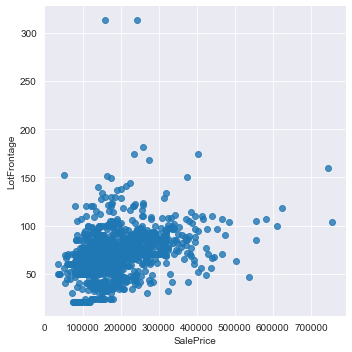



LotArea :  

69
max outlier value: 215245
min outlier value: 1300
LotArea mean: 
10516.828082191782
LotArea std: 
9981.264932379147


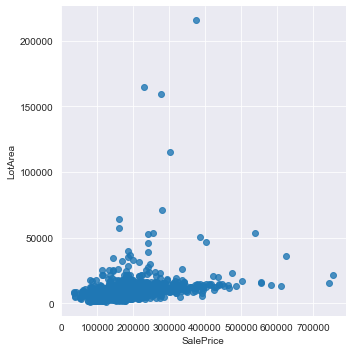



LotShape :  

10
max outlier value: 3
min outlier value: 3
LotShape mean: 
0.40821917808219177
LotShape std: 
0.5822961390911215


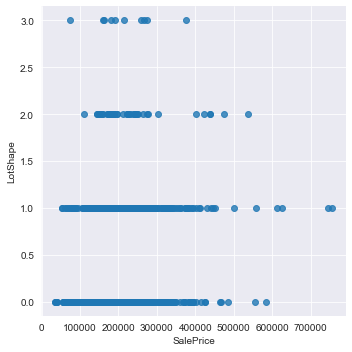



LandSlope :  

78
max outlier value: 3
min outlier value: 1
LandSlope mean: 
0.07123287671232877
LandSlope std: 
0.3459268334588514


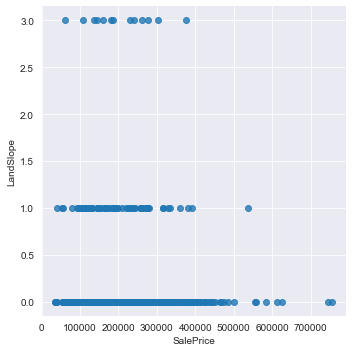



OverallQual :  

2
max outlier value: 1
min outlier value: 1
OverallQual mean: 
6.0993150684931505
OverallQual std: 
1.3829965467415923


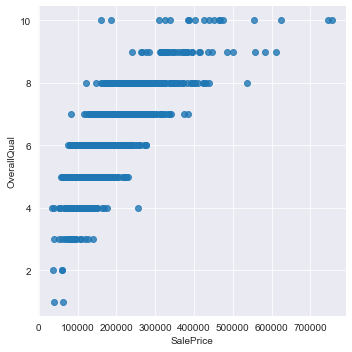



OverallCond :  

125
max outlier value: 9
min outlier value: 1
OverallCond mean: 
5.575342465753424
OverallCond std: 
1.1127993367127367


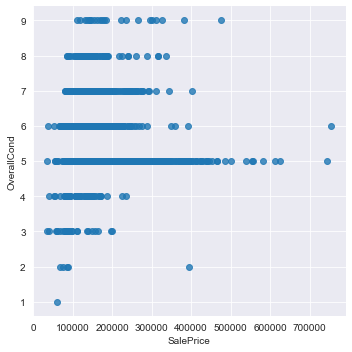



YearBuilt :  

7
max outlier value: 1882
min outlier value: 1872
YearBuilt mean: 
1971.267808219178
YearBuilt std: 
30.202904042525265


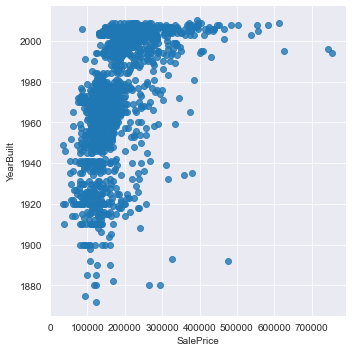





MasVnrArea :  

98
max outlier value: 1600.0
min outlier value: 412.0
MasVnrArea mean: 
103.11712328767123
MasVnrArea std: 
180.73137335812217


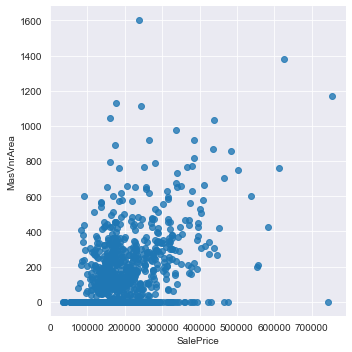





ExterCond :  

178
max outlier value: 4
min outlier value: 0
ExterCond mean: 
1.9164383561643836
ExterCond std: 
0.35105391060465974


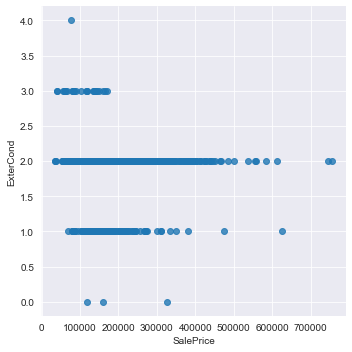





BsmtCond :  

149
max outlier value: 4.0
min outlier value: 0.0
BsmtCond mean: 
1.9383561643835616
BsmtCond std: 
0.42250927596431537


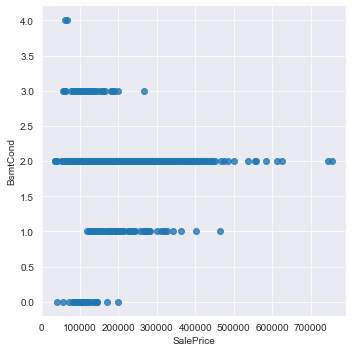







BsmtFinSF1 :  

7
max outlier value: 5644
min outlier value: 1810
BsmtFinSF1 mean: 
443.6397260273973
BsmtFinSF1 std: 
456.09809084092456


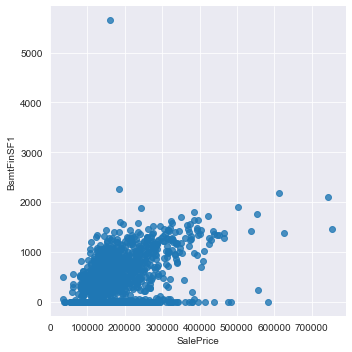



BsmtFinType2 :  

204
max outlier value: 4.0
min outlier value: 0.0
BsmtFinType2 mean: 
4.596575342465753
BsmtFinType2 std: 
1.1487642365697057


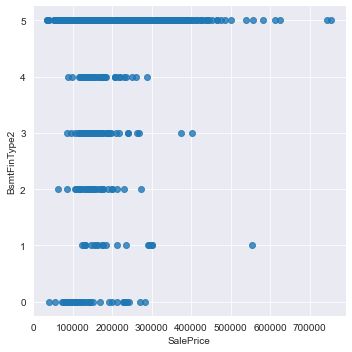



BsmtFinSF2 :  

167
max outlier value: 1474
min outlier value: 28
BsmtFinSF2 mean: 
46.54931506849315
BsmtFinSF2 std: 
161.31927280654057


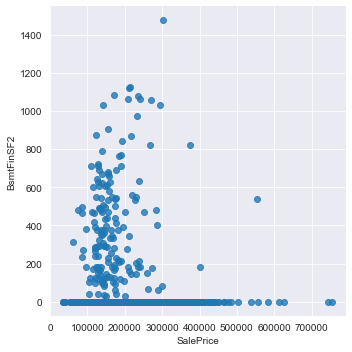



BsmtUnfSF :  

29
max outlier value: 2336
min outlier value: 1686
BsmtUnfSF mean: 
567.2404109589041
BsmtUnfSF std: 
441.8669552924342


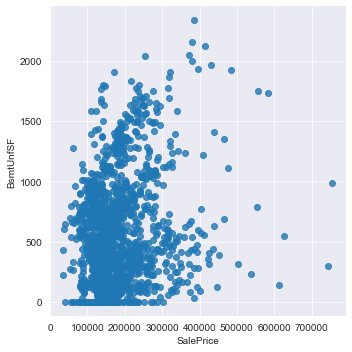



TotalBsmtSF :  

61
max outlier value: 6110
min outlier value: 0
TotalBsmtSF mean: 
1057.4294520547944
TotalBsmtSF std: 
438.7053244594705


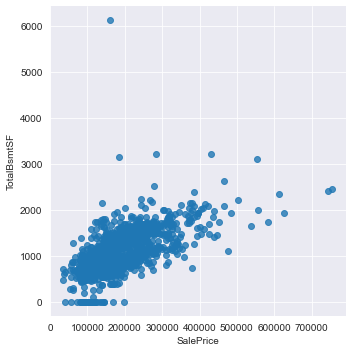





1stFlrSF :  

20
max outlier value: 4692
min outlier value: 2156
1stFlrSF mean: 
1162.626712328767
1stFlrSF std: 
386.5877380410738


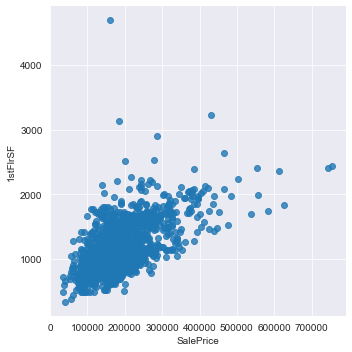



2ndFlrSF :  

2
max outlier value: 2065
min outlier value: 1872
2ndFlrSF mean: 
346.99246575342465
2ndFlrSF std: 
436.5284358862591


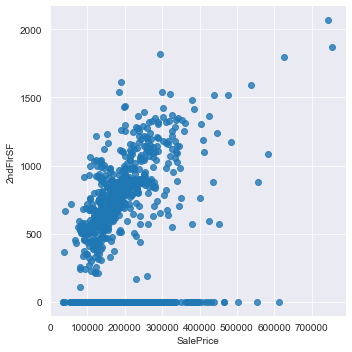



LowQualFinSF :  

26
max outlier value: 572
min outlier value: 53
LowQualFinSF mean: 
5.844520547945206
LowQualFinSF std: 
48.623081433519125


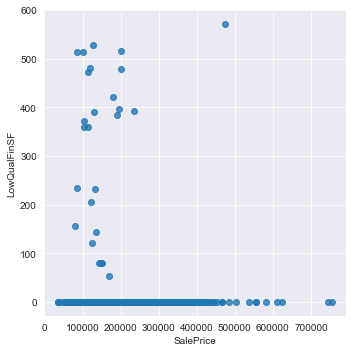



GrLivArea :  

31
max outlier value: 5642
min outlier value: 2775
GrLivArea mean: 
1515.463698630137
GrLivArea std: 
525.4803834232027


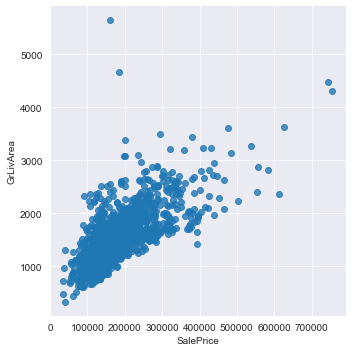



BsmtFullBath :  

1
max outlier value: 3
min outlier value: 3
BsmtFullBath mean: 
0.42534246575342466
BsmtFullBath std: 
0.5189106060897992


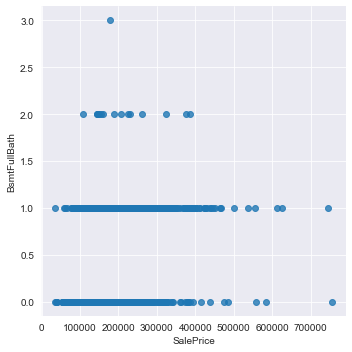



BsmtHalfBath :  

82
max outlier value: 2
min outlier value: 1
BsmtHalfBath mean: 
0.057534246575342465
BsmtHalfBath std: 
0.23875264627920764


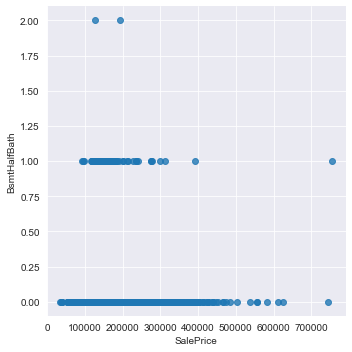







BedroomAbvGr :  

35
max outlier value: 8
min outlier value: 0
BedroomAbvGr mean: 
2.8664383561643834
BedroomAbvGr std: 
0.8157780441442212


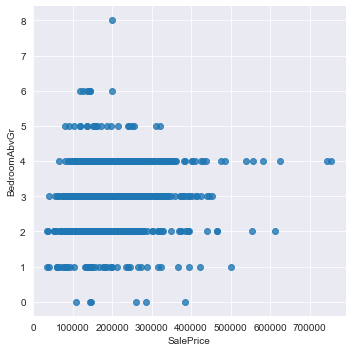



KitchenAbvGr :  

68
max outlier value: 3
min outlier value: 0
KitchenAbvGr mean: 
1.0465753424657533
KitchenAbvGr std: 
0.22033819838402977


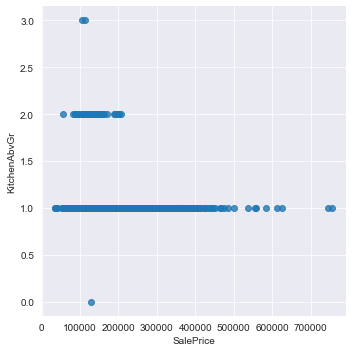





TotRmsAbvGrd :  

30
max outlier value: 14
min outlier value: 11
TotRmsAbvGrd mean: 
6.517808219178082
TotRmsAbvGrd std: 
1.625393290584064


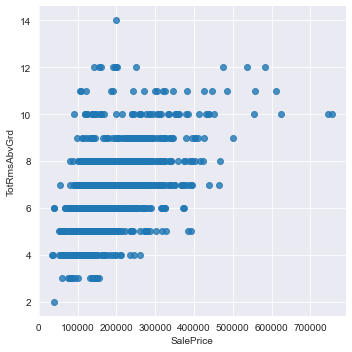



Fireplaces :  

5
max outlier value: 3
min outlier value: 3
Fireplaces mean: 
0.613013698630137
Fireplaces std: 
0.6446663863122344


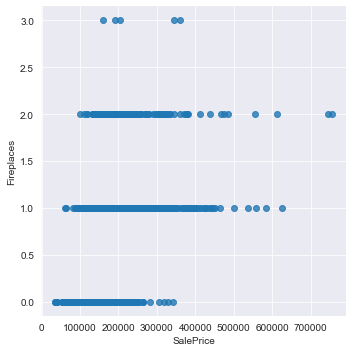





GarageYrBlt :  

1
max outlier value: 1900.0
min outlier value: 1900.0
GarageYrBlt mean: 
1978.5061638868744
GarageYrBlt std: 
23.99458325905758


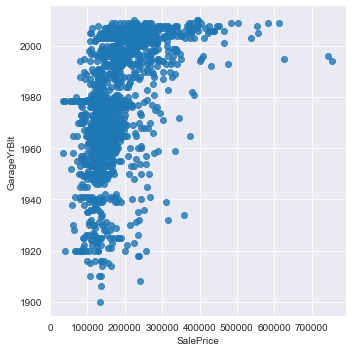





GarageCars :  

5
max outlier value: 4
min outlier value: 4
GarageCars mean: 
1.7671232876712328
GarageCars std: 
0.7473150101111116


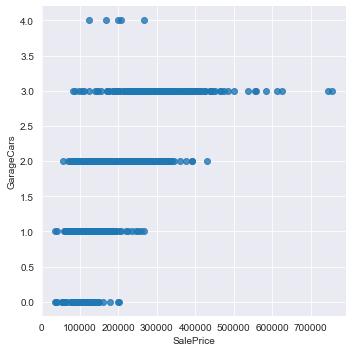



GarageArea :  

21
max outlier value: 1418
min outlier value: 947
GarageArea mean: 
472.9801369863014
GarageArea std: 
213.80484145338076


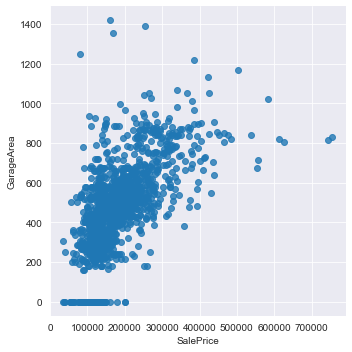



WoodDeckSF :  

32
max outlier value: 857
min outlier value: 421
WoodDeckSF mean: 
94.2445205479452
WoodDeckSF std: 
125.33879435172359


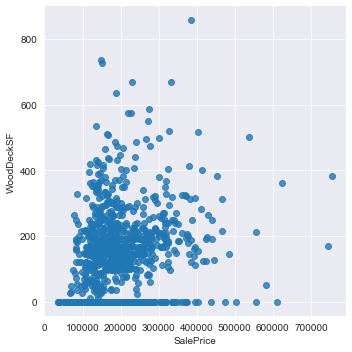



OpenPorchSF :  

77
max outlier value: 547
min outlier value: 172
OpenPorchSF mean: 
46.66027397260274
OpenPorchSF std: 
66.25602767664974


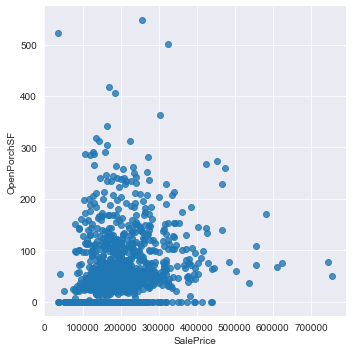



EnclosedPorch :  

208
max outlier value: 552
min outlier value: 19
EnclosedPorch mean: 
21.954109589041096
EnclosedPorch std: 
61.11914860172879


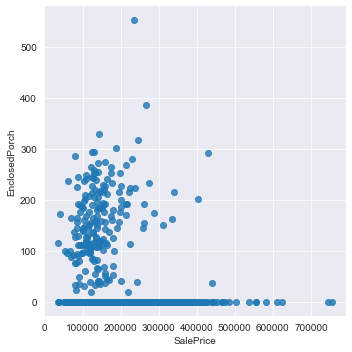



3SsnPorch :  

24
max outlier value: 508
min outlier value: 23
3SsnPorch mean: 
3.4095890410958902
3SsnPorch std: 
29.317330556782203


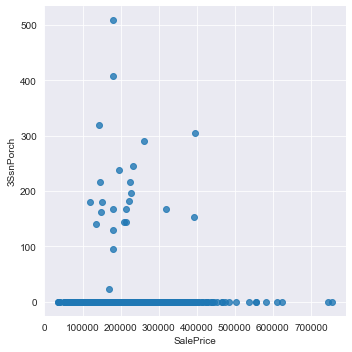



ScreenPorch :  

116
max outlier value: 480
min outlier value: 40
ScreenPorch mean: 
15.060958904109588
ScreenPorch std: 
55.757415281874486


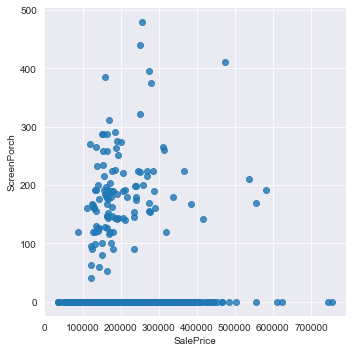



PoolArea :  

7
max outlier value: 738
min outlier value: 480
PoolArea mean: 
2.758904109589041
PoolArea std: 
40.17730694453043


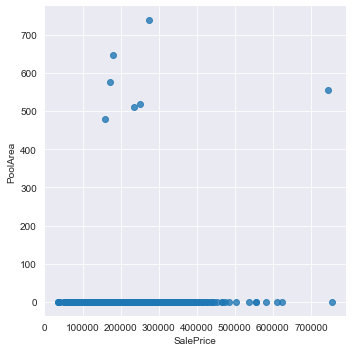



MiscVal :  

52
max outlier value: 15500
min outlier value: 54
MiscVal mean: 
43.489041095890414
MiscVal std: 
496.1230244579311


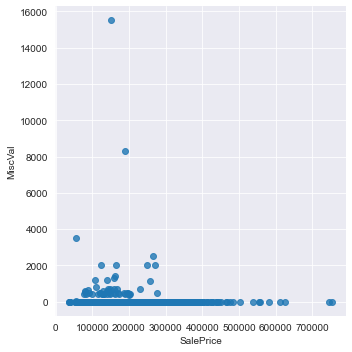







SalePrice :  

61
max outlier value: 755000
min outlier value: 341000
SalePrice mean: 
180921.19589041095
SalePrice std: 
79442.50288288663


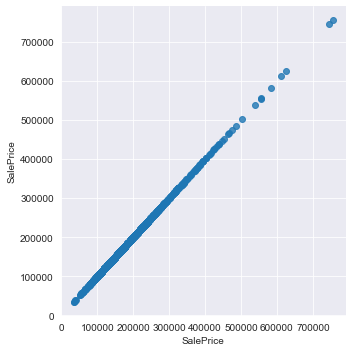

In [53]:
for features in df_train.select_dtypes(exclude = 'object'):
    outliers = find_outliers_IQR(df_train[features])
    
    num_outliers =  len(outliers)
    
    if num_outliers !=0:
        
        print( features, ': ', '\n')
        print (num_outliers)

        print('max outlier value: '+ str(outliers.max()))
        print('min outlier value: '+ str(outliers.min()))
        print('{} mean: '.format(features))
        print( df_train['{}'.format(features)].mean())
        print('{} std: '.format(features))
        print (df_train['{}'.format(features)].std())
        sns.lmplot(x= 'SalePrice', y= features, data = df_train, fit_reg = False)
        plt.show()
    
    print('\n')
    

In [54]:
df_train[df_train.GarageArea > 1200].GarageArea

581     1390
825     1220
1061    1248
1190    1356
1298    1418
Name: GarageArea, dtype: int64

Outliers which may need to be address in feature Engineering:


def fix_outliers(df):

    df = df[df.LotFrontage < 300]
    
    df = df[df.LotArea < 50000]
    
    df = df[df.BsmtFinSF1 <3000]
    
    df = df[df.BsmtFinSF2 <1400]
    
    df = df[df.TotalBsmtSF < 3000]
    
    df = df[df.1stFlrSF < 4000]
    
    df = df[df.LowQualFinSF < 570]
    
    df = df[df.GrLivArea < 4500]
    
    df = df[df.BedroomAbvGr < 7]
    
    df= df[df.TotRmsAbvGrd < 14]
    
    df = df[df.GarageArea < 1221]
    
    
    
    Create Indicator Variables of Missingness

    
    
    


# 3. Feature Engineering

#### Summary from Exploratory Analysis
1. We should combine FullBaths with BsmtFullBaths, likewise for HalfBaths
2. We should combine SF data so that:
    a.GrLivArea means 1st and 2nd floor SF
    b.TotalBsmtSF means total finished Basement SF
    c.BsmtUnfSF means unfished SF in the basement
3. We should elimate Large Lot Area (>100000)
4. We Should drop observations of bedrooms above 7
5. We should think of Other Features to Engineer

## 3.A Engineering New Features

N.B. For the Feature Engineering Section, I will write the code directly in the function code cell

#### We might consider adding a feature for the housing crisis years

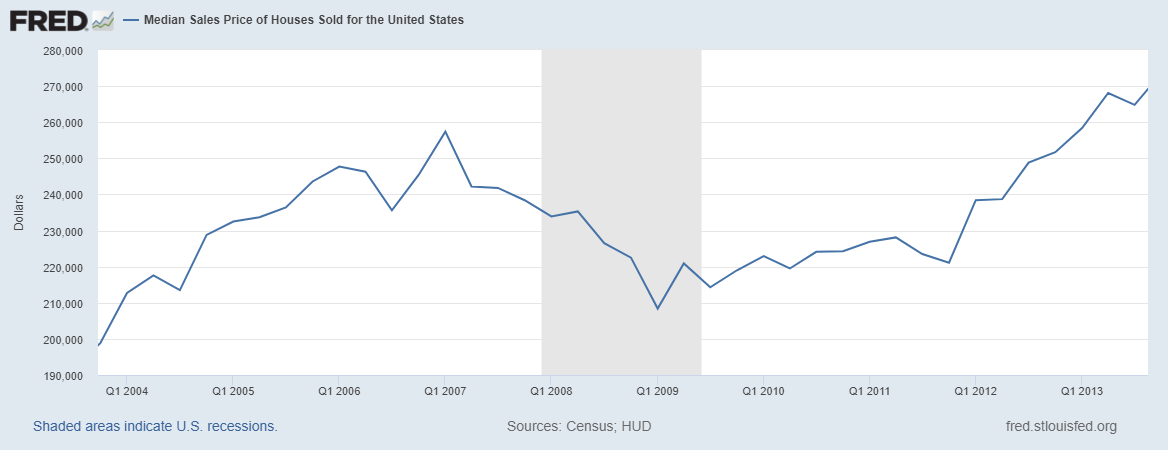

So we can create an indicator variable for 'during_crisis' if YrSold>2008 and YrSold<2010

#### We might consider making a feature for 'Total Package' houses
That is, houses that are newly remodelled, and have all excellent features

#### Need to make variable for categorical features that need dummy variables

## 3.B Functions to Engineer Features

#### The outlier section was added later and submitted to see if addressing potential outliers improved the model's accuracy. However, it performed slightly worse.

Run Function to Fix Outliers 

def fix_outliers(df):

    df = df[df.LotFrontage < 300]
    
    df = df[df.LotArea < 50000]
    
    df = df[df.BsmtFinSF1 <3000]
    
    df = df[df.BsmtFinSF2 <1400]
    
    df = df[df.TotalBsmtSF < 3000]
    
    df = df[df['1stFlrSF'] < 4000]
    
    df = df[df.LowQualFinSF < 570]
    
    df = df[df.GrLivArea < 4500]
    
    df = df[df.BedroomAbvGr < 7]
    
    df= df[df.TotRmsAbvGrd < 14]
    
    df = df[df.GarageArea < 1221]
    
    return df

df_train.shape

df = fix_outliers(df_train)

df_train.shape

df_train[df_train.GarageArea > 1200].GarageArea

df_train = df_train[df_train.LotFrontage < 300]
df_train.shape

Function to fix outliers not working. Manually doing it here:


df_train = df_train[df_train.LotFrontage < 300]
    
df_train = df_train[df_train.LotArea < 50000]

df_train = df_train[df_train.BsmtFinSF1 <3000]
    
df_train = df_train[df_train.BsmtFinSF2 <1400]
    
df_train = df_train[df_train.TotalBsmtSF < 3000]

df_train = df_train[df_train['1stFlrSF'] < 4000]

df_train = df_train[df_train.LowQualFinSF < 570]
    
df_train = df_train[df_train.GrLivArea < 4500]
    
df_train = df_train[df_train.BedroomAbvGr < 7]
    
df_train = df_train[df_train.TotRmsAbvGrd < 14]
    
df_train = df_train[df_train.GarageArea < 1221]

In [61]:
df_train.shape

(1438, 81)

#### 3.B.1 Engineer Features Function

In [62]:
#DATA CLEANING FUNCTION TO BE REPEATED ON TEST SET

def engineer_features(df):
    


    
# Fix Issues in Features
    
    #Bathrooms
    df['FullBath'] = df['FullBath'] + df['BsmtFullBath']
    df['HalfBath'] = df['HalfBath'] + df['BsmtHalfBath']
    
    #Drop BsmtHalfBath and BsmtFullBath
    
    #Square Footage
        
    #Replace GrLivArea with 1st and 2nd floor SF
    df['GrLivArea'] = df['1stFlrSF'] + df['2ndFlrSF']
    
    #Make basement total fnished SF by subtracting out unfinished 
    #Other basement sqfootage variable will be dropped
    df['TotalBsmtSF'] =  df['TotalBsmtSF'] - df['BsmtUnfSF']
    
    #So we will only keep:
    #   GrLivArea (total nonbasement SF)
    #   TotalBsmtSF (total finished basement SF)
    #   BsmtUnfSF
    


# Remove Outliers
#Done manually in step above
    
#Engineer New Features

    #During Recession
    df['during_recession'] = (df.YrSold == '2009').astype(int)
   
    

    return df


#### Augment Data using Engineer_Features Function

In [63]:
engineer_features(df_train)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,during_recession
0,1,60,RL,65.000,8450,Pave,None,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,1,2,PConc,1.000,2.000,3.000,0.000,706,5.000,0,150,706,Gas,0,Y,SBrkr,856,854,0,1710,1,0,3,1,3,1,1,8,Typ,0,0.000,Attchd,2003.000,1.000,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.000,9600,Pave,None,0,Lvl,AllPub,Other,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,2,2,CBlock,1.000,2.000,0.000,1.000,978,5.000,0,284,978,Gas,0,Y,SBrkr,1262,0,0,1262,0,1,2,1,3,1,2,6,Typ,1,2.000,Attchd,1976.000,1.000,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.000,11250,Pave,None,1,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,1,2,PConc,1.000,2.000,2.000,0.000,486,5.000,0,434,486,Gas,0,Y,SBrkr,920,866,0,1786,1,0,3,1,3,1,1,6,Typ,1,2.000,Attchd,2001.000,1.000,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.000,9550,Pave,None,1,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,2,2,BrkTil,2.000,1.000,3.000,1.000,216,5.000,0,540,216,Gas,1,Y,SBrkr,961,756,0,1717,1,0,2,0,3,1,1,7,Typ,1,1.000,Detchd,1998.000,2.000,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.000,14260,Pave,None,1,Lvl,AllPub,Other,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,1,2,PConc,1.000,2.000,1.000,0.000,655,5.000,0,490,655,Gas,0,Y,SBrkr,1145,1053,0,2198,1,0,3,1,4,1,1,9,Typ,1,2.000,Attchd,2000.000,1.000,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,None,0,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,PConc,1.000,2.000,3.000,5.000,0,5.000,0,953,0,Gas,0,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,2,7,Typ,1,2.000,Attchd,1999.000,1.000,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000,0
1456,1457,20,RL,85.000,13175,Pave,None,0,Lvl,AllPub,Inside,0,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,2,2,CBlock,1.000,2.000,3.000,1.000,790,3.000,163,589,953,Gas,2,Y,SBrkr,2073,0,0,2073,1,0,3,0,3,1,2,7,Min,2,2.000,Attchd,1978.000,2.000,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000,0
1457,1458,70,RL,66.000,9042,Pave,None,0,Lvl,AllPub,Inside,0,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,0,1,Other,2.000,1.000,3.000,0.000,275,5.000,0,877,275,Gas,0,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,1,9,Typ,2,1.000,Attchd,1941.000,1.000,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500,0
1458,1

#### 3.B.2 Get Dummies for Data and store as abt

In [64]:
cats_for_dummies = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
                    'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
                    #'MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 
                    'MSSubClass']

### For the categorical features which are commented out, these were numeric features that I converted into categorical,
### but it caused issues with my test data, because the classes did not all match up, which made the number of 
### dummy variables different, which meant I didn't have the same 'shape' for my test data. 
### So I decided not to do that in the first place.



In [65]:
for col in cats_for_dummies:
    print(df_train[col].unique()) # to print categories name only
    print(df_train[col].value_counts()) # to print count of every category

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1132
RM          217
FV           65
RH           15
C (all)       9
Name: MSZoning, dtype: int64
['Pave' 'Grvl']
Pave    1434
Grvl       4
Name: Street, dtype: int64
['None' 'Grvl' 'Pave']
None    1348
Grvl      50
Pave      40
Name: Alley, dtype: int64
['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1305
Bnk      59
HLS      47
Low      27
Name: LandContour, dtype: int64
['Inside' 'Other' 'Corner' 'CulDSac']
Inside     1037
Corner      260
CulDSac      90
Other        51
Name: LotConfig, dtype: int64
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
NAmes      224
CollgCr    150
OldTown    112
Edwards     98
Somerst     86
Gilbert     79
Sawyer      74
NridgHt     74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     40
IDOTRR  

In [66]:
# Variable for categorical features which will need dummy vaariables
# includes nums_to_cats
# Was throwing "Value Error" error when fitting models because I forgot to include nums_to_cats
# And they didn't look like strings (since they are numbers as strings)



print('df shape before dummies: ', df_train.shape)
abt = pd.get_dummies(df_train, columns= cats_for_dummies)
print('abt shape after dummies: ', abt.shape)
abt

df shape before dummies:  (1438, 82)
abt shape after dummies:  (1438, 206)


,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,CentralAir_None,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Other,Electrical_SBrkr,Functional_Maj1,Functional_Min,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_Detchd,GarageType_None,PavedDrive_None,PavedDrive_P,PavedDrive_Y,PoolQC_None,PoolQC_Present,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,1,65.000,8450,0,AllPub,0,7,5,2003,2003,196.000,1,2,1.000,2.000,3.000,0.000,706,5.000,0,150,706,0,856,854,0,1710,1,0,3,1,3,1,1,8,0,0.000,2003.000,1.000,2,548,TA,TA,0,61,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,80.000,9600,0,AllPub,0,6,8,1976,1976,0.000,2,2,1.000,2.000,0.000,1.000,978,5.000,0,284,978,0,1262,0,0,1262,0,1,2,1,3,1,2,6,1,2.000,1976.000,1.000,2,460,TA,TA,298,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,68.000,11250,1,AllPub,0,7,5,2001,2002,162.000,1,2,1.000,2.000,2.000,0.000,486,5.000,0,434,486,0,920,866,0,1786,1,0,3,1,3,1,1,6,1,2.000,2001.000,1.000,2,608,TA,TA,0,42,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,60.000,9550,1,AllPub,0,7,5,1915,1970,0.000,2,2,2.000,1.000,3.000,1.000,216,5.000,0,540,216,1,961,756,0,1717,1,0,2,0,3,1,1,7,1,1.000,1998.000,2.000,3,642,TA,TA,0,35,272,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,84.000,14260,1,AllPub,0,8,5,2000,2000,350.000,1,2,1.000,2.000,1.000,0.000,655,5.000,0,490,655,0,1145,1053,0,2198,1,0,3,1,4,1,1,9,1,2.000,2000.000,1.000,3,836,TA,TA,192,84,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.000,7917,0,AllPub,0,6,5,1999,2000,0.000,2,2,1.000,2.000,3.000,5.000,0,5.000,0,953,0,0,953,694,0,1647,0,0,2,1,3,1,2,7,1,2.000,1999.000,1.000,2,460,TA,TA,0,40,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,1457,85.000,13175,0,AllPub,0,6,6,1978,1988,119.000,2,2,1.000,2.000,3.000,1.000,790,3.000,163,589,953,2,2073,0,0,2073,1,0,3,0,3,1,2,7,2,2.000,1978.000,2.000,2,500,TA,TA,349,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,1458,66.000,9042,0,AllPub,0,7,9,1941,2006,0.000,0,1,2.000,1.000,3.000,0.000,275,5.000,0,877,275,0,1188,1152,0,2340,0,0,2,0,4,1,1,9,2,1.000,1941.000,1.000,1,252,TA,TA,0,60,0,0,0,0,2500,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,

#### 3.B.3 Drop Drops from abt

In [67]:
## I added'HouseStyle_2.5Fin' and 'MiscFeature_TenC' to this drops list because they were not present in my test data
## dropping them did not seem to make a difference
# N.B. Likewise, I dropped a variable from my test data ABT, since it wasn't in my train data

abt_drops =['LowQualFinSF', 'GarageArea', 'GarageQual', 'GarageCond', 'Id', 'Utilities', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtHalfBath', 'BsmtFullBath','PoolArea', 'HouseStyle_2.5Fin', 'MiscFeature_TenC']

In [68]:
abt.shape

(1438, 206)

In [69]:
print('abt shape before drops: ', abt.shape)
print('Drop length: ', len(drops))
abt.drop(abt_drops, axis=1, inplace=True)
print('abt shape after drops: ', abt.shape)
abt

abt shape before drops:  (1438, 206)
Drop length:  12
abt shape after drops:  (1438, 191)


,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,during_recession,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,...,Heating_Other,CentralAir_None,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Other,Electrical_SBrkr,Functional_Maj1,Functional_Min,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_Detchd,GarageType_None,PavedDrive_None,PavedDrive_P,PavedDrive_Y,PoolQC_None,PoolQC_Present,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,65.000,8450,0,0,7,5,2003,2003,196.000,1,2,1.000,2.000,3.000,0.000,5.000,150,706,0,1710,3,1,3,1,1,8,0,0.000,2003.000,1.000,2,0,61,0,0,0,0,2,2008,208500,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,80.000,9600,0,0,6,8,1976,1976,0.000,2,2,1.000,2.000,0.000,1.000,5.000,284,978,0,1262,2,1,3,1,2,6,1,2.000,1976.000,1.000,2,298,0,0,0,0,0,5,2007,181500,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,68.000,11250,1,0,7,5,2001,2002,162.000,1,2,1.000,2.000,2.000,0.000,5.000,434,486,0,1786,3,1,3,1,1,6,1,2.000,2001.000,1.000,2,0,42,0,0,0,0,9,2008,223500,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,60.000,9550,1,0,7,5,1915,1970,0.000,2,2,2.000,1.000,3.000,1.000,5.000,540,216,1,1717,2,0,3,1,1,7,1,1.000,1998.000,2.000,3,0,35,272,0,0,0,2,2006,140000,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.000,14260,1,0,8,5,2000,2000,350.000,1,2,1.000,2.000,1.000,0.000,5.000,490,655,0,2198,3,1,4,1,1,9,1,2.000,2000.000,1.000,3,192,84,0,0,0,0,12,2008,250000,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.000,7917,0,0,6,5,1999,2000,0.000,2,2,1.000,2.000,3.000,5.000,5.000,953,0,0,1647,2,1,3,1,2,7,1,2.000,1999.000,1.000,2,0,40,0,0,0,0,8,2007,175000,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1456,85.000,13175,0,0,6,6,1978,1988,119.000,2,2,1.000,2.000,3.000,1.000,3.000,589,953,2,2073,3,0,3,1,2,7,2,2.000,1978.000,2.000,2,349,0,0,0,0,0,2,2010,210000,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,66.000,9042,0,0,7,9,1941,2006,0.000,0,1,2.000,1.000,3.000,0.000,5.000,877,275,0,2340,2,0,4,1,1,9,2,1.000,1941.000,1.000,1,0,60,0,0,0,2500,5,2010,266500,0,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1458,68.000,9717,0,0,5,6,1950,1996,

#### 3.B.4 Save Analytical Base Table to CSV

In [70]:
abt.to_csv('analytical_base_table.csv', index=None)

# 4.  Algorithm Selection

## 4.A Read abt and split data for model training

#### 4.A.1 Read in Analytical Base Table

In [71]:
df = pd.read_csv('analytical_base_table.csv')
print(df.shape)

(1438, 191)


#### 4.A.2 Create Separate objects for Target Variable and Input Features

In [72]:
#Target Variable
y = df.SalePrice

#Input Features
X = df.drop('SalePrice', axis=1)


#### 4.A.3 Train Test Split

In [73]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [74]:
#CONFIRM we have correct number of observations in each subset

print( len(X_train), len(X_test), len(y_train), len(y_test))

1150 288 1150 288


## 4.B Pipelines

#### 4.B.1 Pipelines Dictionary
    Create pipelines dictionary
    I am using StandardScaler preprocessing class
    I will use lasso, ridge, elastic net, random forest, and gradient boosting regression

In [87]:
#create a pipeline dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

#### 4.B.2 Create Hyperparameter Variables and Dictionary

#### Hyperparameter Grids Dictionary

    N.B.
    For Ridge and Lasso, alpha is the most important hyper parameter 
    alpha (lambda) is the strength of the penalty


In [88]:
#Lasso Hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}


#Ridge Hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}


#Enet Hyperparameters also need L1 Ratio

enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

#Random Forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [600, 650, 680, 700], 
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}


#Gradient Boosting Regressor hyperparameter
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators' : [600, 650, 680, 700],
    'gradientboostingregressor__learning_rate' : [0.002, 0.008, 0.01, 0.03, 0.05, 0.1, 0.2], 
    'gradientboostingregressor__max_depth' : [1, 2, 3, 4, 5, 6]
}

#### Hyperparamters Dictionary

In [89]:
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf'   : rf_hyperparameters,
    'gb'   : gb_hyperparameters
}

#### Perform Cross-Validation
Will use GRIDSEARCHCV (pipeline, hyperparameter, number of folds )

In [90]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models dictionary 
    fitted_models[name] = model
    
    # Print whether the model has been fitted
    print(name, 'has been fitted.')


lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


# 5. Model Selection 

## 5.A Compare Best Score for each model that was fitted

In [91]:
for key, value in fitted_models.items():
    print(key, value.best_score_)

lasso 0.8618301220043373
ridge 0.8770524328845821
enet 0.8835997935387185
rf 0.891423247808398
gb 0.9137368162087087


In [92]:
#Print performance of each model from Fitted_Models on test set (from _df_train)
#Loop to display r2Score and Mean Absolute Error for each model
for name, model in fitted_models.items():
    print(name, "\n", "---------")
    pred = model.predict(X_test)
    print( "R^2: ", r2_score(y_test, pred) )
    print( "MAE: ", mean_absolute_error(y_test, pred) )
    print("\n")



lasso 
 ---------
R^2:  0.8953631940745155
MAE:  18170.45248951966


ridge 
 ---------
R^2:  0.8999100788685118
MAE:  17750.22254271252


enet 
 ---------
R^2:  0.8980920737365897
MAE:  17608.933628005958


rf 
 ---------
R^2:  0.8969957310997321
MAE:  17311.31094328704


gb 
 ---------
R^2:  0.9281748741247065
MAE:  14909.669182712478




### *Winning Model*

Winning Model:
Gradient Boosting Regressor ('gb') 

    R^2:  0.9281748741247065
    MAE:  14909.669182712478

#### Plot of Winning Model on Test Set (from df_train)

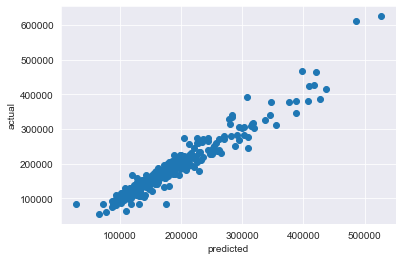

In [93]:
plt.scatter(fitted_models['gb'].predict(X_test), y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#### Display winning pipeline object

In [94]:
fitted_models['gb'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=2, n_estimators=680,
                                           random_state=123))])

#### Save Model with Pickle

In [109]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f )

## Applying Model to Raw Test Data

In [110]:
# Load final_model.pkl as model

with open('final_model.pkl', 'rb') as f:
    final_model = pickle.load(f)


In [111]:
#Make sure the pickle load worked
type(final_model)
final_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=2, n_estimators=680,
                                           random_state=123))])

In [112]:
df_test = pd.read_csv('test.csv')

In [113]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Clean Raw/Test Data (get it into the same format as the train data)

#### Functions to clean and augment data

In [114]:
#Data Cleaning Function
def clean_data(df):

#Define Variables

    
    #Assign categorical feaures variable
    cat_features = df.dtypes[df.dtypes == 'object'].index.tolist()

    #Categorical features which should be converted to ordinals
    cats_to_nums = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish']
    
    #Numeric Features which should be strings
    nums_to_cats = [
        #'MoSold',
       # 'YrSold', 
      #  'GarageYrBlt',
       # 'YearBuilt',
        #'YearRemodAdd',
        'MSSubClass']
    
    
    #Categorical NaNs which should be 'None'
    cat_nans_to_None = ['Alley', 'MasVnrType', 'CentralAir', 'GarageType', 'PavedDrive', 'PoolQC', 
                        'Fence', 'MiscFeature',]

    #Categorical NaNs which should not be 'None'
    cat_nans_to_mode= ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood', 'Electrical', 'Condition1',
                       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                       'Foundation','Heating', 'Functional', 'SaleType', 'SaleCondition', ]

  

    #Variable list of numerical NaNs that get replaced with 0
    num_nans_to_0 = ['MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath',
                     'BsmtHalfBath',  'Fireplaces', 'GarageCars',  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                     '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal','LotShape', 'LandSlope', 'ExterQual', 'ExterCond',
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 
                     'KitchenQual', 'FireplaceQu', 'GarageFinish']

    #Variable list of numerical NaNs that get replaced with Mean
    num_nans_to_mean = [ 'MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd',
        'MSSubClass','LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
                        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', #'SalePrice'
                       ]

    
    

#CLEAN DATA:


#Convert Categorical Features which should be ordinals

    #LotShape
    df['LotShape'] = df.LotShape.replace(
        {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
    
    #LandSlope
    df['LandSlope'] = df.LandSlope.replace(
        {'Gtl': 0, 'Mod': 1, 'IR2': 2, 'Sev': 3})
    
    #ExterQual
    df['ExterQual'] = df.ExterQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #ExterCond
    df['ExterCond'] = df.ExterCond.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #BsmtQual
    df['BsmtQual'] = df.BsmtQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    # BsmtCond
    df['BsmtCond'] = df.BsmtCond.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #BsmtExposure
    df['BsmtExposure'] = df.BsmtExposure.replace(
        {'Gd': 0, 'Av': 1, 'Mn': 2, 'No': 3})
    
    #BsmtFinType1
    df['BsmtFinType1'] = df.BsmtFinType1.replace(
        {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})
    
    #BsmtFinType2
    df['BsmtFinType2'] = df.BsmtFinType2.replace(
        {'GLQ': 0, 'ALQ': 1, 'BLQ': 2, 'Rec': 3, 'LwQ': 4, 'Unf': 5})
    
    #HeatingQC
    df['HeatingQC'] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #KitchenQual
    df['KitchenQual'] = df.KitchenQual.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #FireplaceQu
    df['FireplaceQu'] = df.FireplaceQu.replace(
        {'Ex': 0, 'Gd': 1, 'TA': 2, 'Fa': 3, 'Po': 4})
    
    #GarageFinish
    df['GarageFinish'] = df.GarageFinish.replace(
        {'Fin': 0, 'RFn': 1, 'Unf': 2})
    
    print ('Relevant Categorical Features replaced as ordinals.')
    
    
    
#Replace Sparse Classes
    
    #LandContour
    df.LandContour.replace([ 'Bnk' 'Low' 'HLS'], 'Other', inplace=True)
    
    #LotConfig
    df.LotConfig.replace(['FR2', 'FR3'], 'Other', inplace=True)
    
    #Condition1 alteration
    df.Condition1.replace(['RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe'], 'Other', inplace = True)
    
    #Condition2 alteration
    df.Condition2.replace(['Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'], 'Other', inplace = True)
    
    #RoofStyle alteration
    df.RoofStyle.replace(['Gambrel', 'Mansard', 'Flat', 'Shed'], 'Other', inplace = True)
    
    #RoofMatl alteration
    df.RoofMatl.replace(['WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', 'Roll', 'ClyTile'], 'Other', inplace = True)
    
    #Exterior1st alteration
    df.Exterior1st.replace(['BrkComm', 'AsphShn', 'Stone', 'ImStucc', 'CBlock'], 'Other', inplace = True) 
    
    #Exterior2nd alteration
    df.Exterior2nd.replace(['AsphShn', 'Stone', 'ImStucc', 'CBlock'], 'Other', inplace = True)
    
    #Foundation
    df.Foundation.replace(['Wood', 'Stone'], 'Other', inplace=True)
        
    #Heating alteration
    df.Heating.replace(['GasA','GasW'], 'Gas', inplace = True)
    df.Heating.replace(['Grav', 'Wall', 'OthW', 'Floor'], 'Other', inplace = True)
    
    #Electrical alteration
    df.Electrical.replace(['FuseP', 'Mix'], 'Other', inplace = True)
    
    #Functional alteration
    df.Functional.replace(['Mod', 'Maj2','Sev'], 'Other', inplace = True)
    df.Functional.replace(['Min1', 'Min2'], 'Min', inplace = True)   
           
    #GarageType
    df.GarageType.replace([ 'BuiltIn', 'Basment', '2Types'], 'Attchd', inplace=True)
    df.GarageType.replace(['CarPort'], 'None', inplace=True)
    
    #Fence
    df.Fence.replace(['MnPrv' 'GdWo' ], 'GdPrv', inplace=True)
    df.Fence.replace( ['MnWw'], 'None', inplace=True)
    
    #SaleType alteration
    df.SaleType.replace(['ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'], 'Other', inplace = True)
    
    #PoolQC
    df.PoolQC.replace(['Gd', 'Ex','Fa'], 'Present', inplace = True)
    
    #SaleCondition alteration
    df.SaleCondition.replace(['AdjLand', 'Alloca', 'Family'], 'Other', inplace=True)
    
    #Central air - N to match None value conversion to 'None'
    df.CentralAir.replace(['N'], 'None', inplace=True)
    
    #PavedDrive
    df.PavedDrive.replace(['N'], 'None', inplace=True)
    
    print( 'Sparse classes have been addressed.')
    
    
#Loops to Fill NaNs
    
    #Categorical NaNs to None
    for feature in cat_nans_to_None:
        df[feature].fillna('None', inplace = True)
    print ('Cat NaNs filled to None')
    
    #Categorical NaNs to Mode
    for feature in cat_nans_to_mode:
        df[feature].fillna(df[feature].mode()[0], inplace = True)
    print ('Cat NaNs filled to Mode')
    
    #Numeric NaNs to 0
    for feature in num_nans_to_0:
        df[feature].fillna(0, inplace = True)
    print ('Num NaNs filled to 0')
    
    #Numeric NaNs to Mean
    for feature in num_nans_to_mean:
        df['{}_Missing'.format(feature)] = (df['{}'.format(feature)].isnull().astype(int)
        featuremean = df[feature].mean()
        df[feature].fillna(featuremean, inplace = True)
    print ('Num NaNs filled to Mean')
    

    
#Convert Relevant Numeric Features to Strings
#Remember these will need dummy variables!
    for var in nums_to_cats:
        df[var] = df[var].astype(str)
    print( 'Relevant Numeric Features replaced as strings')
    
    print ('Data has been cleaned.')
    
    return df

In [115]:
clean_data(df_test)

Relevant Categorical Features replaced as ordinals.
Sparse classes have been addressed.
Cat NaNs filled to None
Cat NaNs filled to Mode
Num NaNs filled to 0
Num NaNs filled to Mean
Relevant Numeric Features replaced as strings
Data has been cleaned.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,None,0,Lvl,AllPub,Inside,0,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,CBlock,2.000,2.000,3.000,3.000,468.000,4.000,144.000,270.000,882.000,Gas,2,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,2.000,5,Typ,0,0.000,Attchd,1961.000,2.000,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,None,1,Lvl,AllPub,Corner,0,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,2,2,CBlock,2.000,2.000,3.000,1.000,923.000,5.000,0.000,406.000,1329.000,Gas,2,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,1.000,6,Typ,0,0.000,Attchd,1958.000,2.000,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,None,1,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,PConc,1.000,2.000,3.000,0.000,791.000,5.000,0.000,137.000,928.000,Gas,1,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,2.000,6,Typ,1,2.000,Attchd,1997.000,0.000,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,None,1,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,2,2,PConc,2.000,2.000,3.000,0.000,602.000,5.000,0.000,324.000,926.000,Gas,0,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,1.000,7,Typ,1,1.000,Attchd,1998.000,0.000,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,None,1,HLS,AllPub,Inside,0,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,1,2,PConc,1.000,2.000,3.000,1.000,263.000,5.000,0.000,1017.000,1280.000,Gas,0,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,1.000,5,Typ,0,0.000,Attchd,1992.000,1.000,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.000,1936,Pave,None,0,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,2,2,CBlock,2.000,2.000,3.000,5.000,0.000,5.000,0.000,546.000,546.000,Gas,1,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,2.000,5,Typ,0,0.000,None,1977.721,0.000,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.000,1894,Pave,None,0,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,2,2,CBlock,2.000,2.000,3.000,3.000,252.000,5.000,0.000,294.000,546.000,Gas,2,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,2.000,6,Typ,0,0.000,None,1970.000,2.000,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.000,20000,Pave,None,0,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,CBlock,2.000,2.000,3.000,1.000,1224.000

Function to Engineer Features on Test Data

In [116]:
#DATA CLEANING FUNCTION TO BE REPEATED ON TEST SET

def engineer_features(df):
    

    
# Fix Issues in Features
    
    #Bathrooms
    df['FullBath'] = df['FullBath'] + df['BsmtFullBath']
    df['HalfBath'] = df['HalfBath'] + df['BsmtHalfBath']
    
    #Drop BsmtHalfBath and BsmtFullBath
    
    #Square Footage
        
    #Replace GrLivArea with 1st and 2nd floor SF
    df['GrLivArea'] = df['1stFlrSF'] + df['2ndFlrSF']
    
    #Make basement total fnished SF by subtracting out unfinished 
    #Other basement sqfootage variable will be dropped
    df['TotalBsmtSF'] =  df['TotalBsmtSF'] - df['BsmtUnfSF']
    
    #So we will only keep:
    #   GrLivArea (total nonbasement SF)
    #   TotalBsmtSF (total finished basement SF)
    #   BsmtUnfSF
    



    
#Engineer New Features

    #During Recession
   
    return df


In [117]:
engineer_features(df_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,during_recession
0,1461,20,RH,80.000,11622,Pave,None,0,Lvl,AllPub,Inside,0,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,CBlock,2.000,2.000,3.000,3.000,468.000,4.000,144.000,270.000,612.000,Gas,2,Y,SBrkr,896,0,0,896,0.000,0.000,1.000,0.000,2,1,2.000,5,Typ,0,0.000,Attchd,1961.000,2.000,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,0
1,1462,20,RL,81.000,14267,Pave,None,1,Lvl,AllPub,Corner,0,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,2,2,CBlock,2.000,2.000,3.000,1.000,923.000,5.000,0.000,406.000,923.000,Gas,2,Y,SBrkr,1329,0,0,1329,0.000,0.000,1.000,1.000,3,1,1.000,6,Typ,0,0.000,Attchd,1958.000,2.000,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.000,13830,Pave,None,1,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,2,2,PConc,1.000,2.000,3.000,0.000,791.000,5.000,0.000,137.000,791.000,Gas,1,Y,SBrkr,928,701,0,1629,0.000,0.000,2.000,1.000,3,1,2.000,6,Typ,1,2.000,Attchd,1997.000,0.000,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,0
3,1464,60,RL,78.000,9978,Pave,None,1,Lvl,AllPub,Inside,0,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,2,2,PConc,2.000,2.000,3.000,0.000,602.000,5.000,0.000,324.000,602.000,Gas,0,Y,SBrkr,926,678,0,1604,0.000,0.000,2.000,1.000,3,1,1.000,7,Typ,1,1.000,Attchd,1998.000,0.000,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,0
4,1465,120,RL,43.000,5005,Pave,None,1,HLS,AllPub,Inside,0,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,1,2,PConc,1.000,2.000,3.000,1.000,263.000,5.000,0.000,1017.000,263.000,Gas,0,Y,SBrkr,1280,0,0,1280,0.000,0.000,2.000,0.000,2,1,1.000,5,Typ,0,0.000,Attchd,1992.000,1.000,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.000,1936,Pave,None,0,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,2,2,CBlock,2.000,2.000,3.000,5.000,0.000,5.000,0.000,546.000,0.000,Gas,1,Y,SBrkr,546,546,0,1092,0.000,0.000,1.000,1.000,3,1,2.000,5,Typ,0,0.000,None,1977.721,0.000,0.000,0.000,NaN,NaN,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,0
1455,2916,160,RM,21.000,1894,Pave,None,0,Lvl,AllPub,Inside,0,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000,2,2,CBlock,2.000,2.000,3.000,3.000,252.000,5.000,0.000,294.000,252.000,Gas,2,Y,SBrkr,546,546,0,1092,0.000,0.000,1.000,1.000,3,1,2.000,6,Typ,0,0.000,None,1970.000,2.000,1.000,286.000,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,0
1456,2917,20,RL,160.000,20000,Pave,None,0,Lvl,AllPub,Inside,0,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,19

In [118]:
df_test.shape

(1459, 81)

Dummies and ABT for Test Data

In [119]:
# Variable for categorical features which will need dummy vaariables
# Variable for categorical features which will need dummy vaariables
# includes nums_to_cats
# Was throwing "Value Error" error when fitting models because I forgot to include nums_to_cats
# And they didn't look like strings (since they are numbers as strings)
cats_for_dummies =['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
                    'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
                    #'MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 
                    'MSSubClass']



 #'MoSold',
       # 'YrSold', 
      #  'GarageYrBlt',
       # 'YearBuilt',
        #'YearRemodAdd'


print('df shape before dummies: ', df_test.shape)
test_abt = pd.get_dummies(df_test, columns= ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
                    'GarageType', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
                    #'MoSold', 'YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 
                    'MSSubClass'])
                          
                          
print('abt shape after dummies: ', test_abt.shape)
test_abt

df shape before dummies:  (1459, 81)
abt shape after dummies:  (1459, 204)


,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,...,CentralAir_None,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Other,Electrical_SBrkr,Functional_Maj1,Functional_Min,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_Detchd,GarageType_None,PavedDrive_None,PavedDrive_P,PavedDrive_Y,PoolQC_None,PoolQC_Present,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,1461,80.000,11622,0,AllPub,0,5,6,1961,1961,0.000,2,2,2.000,2.000,3.000,3.000,468.000,4.000,144.000,270.000,612.000,2,896,0,0,896,0.000,0.000,1.000,0.000,2,1,2.000,5,0,0.000,1961.000,2.000,1.000,730.000,TA,TA,140,0,0,0,120,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1462,81.000,14267,1,AllPub,0,6,6,1958,1958,108.000,2,2,2.000,2.000,3.000,1.000,923.000,5.000,0.000,406.000,923.000,2,1329,0,0,1329,0.000,0.000,1.000,1.000,3,1,1.000,6,0,0.000,1958.000,2.000,1.000,312.000,TA,TA,393,36,0,0,0,0,12500,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1463,74.000,13830,1,AllPub,0,5,5,1997,1998,0.000,2,2,1.000,2.000,3.000,0.000,791.000,5.000,0.000,137.000,791.000,1,928,701,0,1629,0.000,0.000,2.000,1.000,3,1,2.000,6,1,2.000,1997.000,0.000,2.000,482.000,TA,TA,212,34,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1464,78.000,9978,1,AllPub,0,6,6,1998,1998,20.000,2,2,2.000,2.000,3.000,0.000,602.000,5.000,0.000,324.000,602.000,0,926,678,0,1604,0.000,0.000,2.000,1.000,3,1,1.000,7,1,1.000,1998.000,0.000,2.000,470.000,TA,TA,360,36,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1465,43.000,5005,1,AllPub,0,8,5,1992,1992,0.000,1,2,1.000,2.000,3.000,1.000,263.000,5.000,0.000,1017.000,263.000,0,1280,0,0,1280,0.000,0.000,2.000,0.000,2,1,1.000,5,0,0.000,1992.000,1.000,2.000,506.000,TA,TA,0,82,0,0,144,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.000,1936,0,AllPub,0,4,7,1970,1970,0.000,2,2,2.000,2.000,3.000,5.000,0.000,5.000,0.000,546.000,0.000,1,546,546,0,1092,0.000,0.000,1.000,1.000,3,1,2.000,5,0,0.000,1977.721,0.000,0.000,0.000,NaN,NaN,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1455,2916,21.000,1894,0,AllPub,0,4,5,1970,1970,0.000,2,2,2.000,2.000,3.000,3.000,252.000,5.000,0.000,294.000,252.000,2,546,546,0,1092,0.000,0.000,1.000,1.000,3,1,2.000,6,0,0.000,1970.000,2.000,1.000,286.000,TA,TA,0,24,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0

Drop Drops from Test Data

In [120]:
test_abt_drops =['LowQualFinSF', 'GarageArea', 'GarageQual', 'GarageCond', 'Id', 'Utilities', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtHalfBath', 'BsmtFullBath','PoolArea', 'MSSubClass_150' ]

In [121]:
print('abt shape before drops: ', test_abt.shape)
print('Drop length: ', len(drops))
test_abt.drop(test_abt_drops, axis=1, inplace=True)
print('abt shape after drops: ', test_abt.shape)
test_abt

abt shape before drops:  (1459, 204)
Drop length:  12
abt shape after drops:  (1459, 190)


,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,during_recession,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,Heating_Other,CentralAir_None,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Other,Electrical_SBrkr,Functional_Maj1,Functional_Min,Functional_Other,Functional_Typ,GarageType_Attchd,GarageType_Detchd,GarageType_None,PavedDrive_None,PavedDrive_P,PavedDrive_Y,PoolQC_None,PoolQC_Present,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,80.000,11622,0,0,5,6,1961,1961,0.000,2,2,2.000,2.000,3.000,3.000,4.000,270.000,612.000,2,896,1.000,0.000,2,1,2.000,5,0,0.000,1961.000,2.000,1.000,140,0,0,0,120,0,6,2010,0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,81.000,14267,1,0,6,6,1958,1958,108.000,2,2,2.000,2.000,3.000,1.000,5.000,406.000,923.000,2,1329,1.000,1.000,3,1,1.000,6,0,0.000,1958.000,2.000,1.000,393,36,0,0,0,12500,6,2010,0,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,74.000,13830,1,0,5,5,1997,1998,0.000,2,2,1.000,2.000,3.000,0.000,5.000,137.000,791.000,1,1629,2.000,1.000,3,1,2.000,6,1,2.000,1997.000,0.000,2.000,212,34,0,0,0,0,3,2010,0,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,78.000,9978,1,0,6,6,1998,1998,20.000,2,2,2.000,2.000,3.000,0.000,5.000,324.000,602.000,0,1604,2.000,1.000,3,1,1.000,7,1,1.000,1998.000,0.000,2.000,360,36,0,0,0,0,6,2010,0,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,43.000,5005,1,0,8,5,1992,1992,0.000,1,2,1.000,2.000,3.000,1.000,5.000,1017.000,263.000,0,1280,2.000,0.000,2,1,1.000,5,0,0.000,1992.000,1.000,2.000,0,82,0,0,144,0,1,2010,0,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.000,1936,0,0,4,7,1970,1970,0.000,2,2,2.000,2.000,3.000,5.000,5.000,546.000,0.000,1,1092,1.000,1.000,3,1,2.000,5,0,0.000,1977.721,0.000,0.000,0,0,0,0,0,0,6,2006,0,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1455,21.000,1894,0,0,4,5,1970,1970,0.000,2,2,2.000,2.000,3.000,3.000,5.000,294.000,252.000,2,1092,1.000,1.000,3,1,2.000,6,0,0.000,1970.000,2.000,1.000,0,24,0,0,0,0,4,2006,0,0,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,160.000,20000,0,0,5,7,1960,1996,0.000,2,2,2.000,2.000,3.000,1.000,5.000,0.000,1224.000,0,1224,2.000,0.000,4,1,2.000,7,1,2.000,1960.000,2.000,2.000,474,0,0,0,0,0,9,2006,0,0,0,0

#### Test Data is now augmented and ready for predictions

In [122]:
y_pred = final_model.predict(test_abt)
y_pred

array([118132.3910992 , 163490.91449306, 186247.03988637, ...,
       154481.31079687, 118362.31661909, 217601.92502134])

In [123]:
pred = pd.DataFrame(y_pred)
submission_df = pd.read_csv('sample_submission.csv')
submission_data = pd.concat([submission_df['Id'], pred], axis=1)
submission_data.to_csv('submission_predictions.csv', index = False)

# Insights and Analysis

### Overview

**This model's predictions placed 1239/4357 !** 

**This model's RMSE (Root Mean Squared Error) was 0.13255.**

### Important Notes:


#### Original work
There are many examples and tutorials on Youtube that walk-through this competition. My goal was to build a model on my own, using only the knowledge I gained from my ML course. I did allow myself to refer to previous work I did in the course, as well as relevent video lessons.

(N.B. I did end up borrowing code in two places. First, the only code I copied for my first submission was in the final code block, which concatenated my predictions with the submission ID list. This did not impact my model at all. It was copied because this was my first Kaggle submission, and I was not sure about the correct submission format. Second, after submiting the first predictions, I explored further tweaks to my model such as removing additional outliers. The idea for the outlier detection loop was taken from somewhere else. However, this ended up hurting my model.)


#### Cleaning and Augmenting Data

A summary of my approach to cleaning and augmenting the data is provided after each section. The long list of outliers was added after the initial submission in hopes that it would improve my model. It did not, so these code blocks were commented out.


#### Approach to Test Data
I did view many other video tutorials on this competition to compare my approach with that of others. Most (all?) began by combining test and train data and then performing the data cleaning and alterations on both at once. One benefit of this approach is that both with have the same final shape. In my approach, I did not touch the test data until my model was built, since this seems to be best practice.

This did lead to some problems (see code comments). The test data and the train data had some different classes in their categorical variables. So when I created dummy variables, the train and test data had different shapes. My solution was to drop these observations. A better approach may have been to loop through the categorical variables, and replace any novel classes with "other". This would ensure that the cleaning and augmenting functions could work for any new unseen data. 

#### Adjustments made and resubmitted
I resubmitted many different versions of the model: with different hyperparameters, with different potential outliers removed, etc. The original model performed the best.



### Conclusion

Overall, my win condition was met. I set out to build a "good" model. Its performance surpassed my expectations. 